# Homework1

Please upload to Brightspace a **.zip** archive containing your Jupyter Notebook with solutions and all data required to reproduce your solutions. 

Please also prepare a **requirements.txt** file which lists all the packages that you have used for your homework, one package per line. This will allow us to install all required packages.

Please name your .zip archive using your full name and student id as follows - **Firstname_Lastname_ID12345678_COMP47350_Homework1.zip**. 

For your Notebook, please split the code and explanations into cells so that it is easy to see and read the results of each step of your solution. Please remember to name your variables and methods with self-explanatory names. Please remember to write justifications for the decisions you make and code you write. 

Your code and analysis is like a story that awaits to be read. Always start with an introduction about the problem and your understanding of the problem domain and data analytics solution and describe the steps you do and your findings from each step.

The accepted file formats for the homework are:
    - .ipynb
    - .zip
    - .png
    - .pdf
    - .csv
    
**Please keep the whole code in a single notebook**. Usage of external tools/files is discouraged for portability reasons. Files in any other format but mentioned above can be used but will not be considered for the submission (including .doc, .rar, .7z, .pages, .xlsx, .tex etc.). 
Any image format is allowed to be used as far as the images appear embedded in your report (.ipynb or .pdf or .html).

**Deadline: Monday, 10 March, 2025, midnight.** 

## Exercises

This homework focuses on data understanding and preparation for a particular problem and dataset.
The data comes from the California Department of Forestry and Fire Protection [(CAL FIRE)](https://www.fire.ca.gov). CAL FIRE provides fire prevention and protection, emergency response, and natural resource protection services in the USA. 

In this analysis, we focus on using the data collected by CAL FIRE to build a data analytics solution for structure damage risk prediction. 
The full database represents structures impacted to different extents by wildland fire. The dataset we work with is a sample of the public data released by CAL FIRE, where the outcome for the target feature Damage is known and is only in the category "No Damage" or "Destroyed (>50%)").
https://data.ca.gov/dataset/cal-fire-damage-inspection-dins-data

Each student will work with a different subset of the data. The CSV file is named using the format: **cal-wildfires-[your-student-number].csv**, e.g., **cal-wildfires-12345.csv** is the data file for a student with number 12345. You need to work with the CSV file corresponding to your student number, available from this [[link]](https://drive.google.com/drive/folders/1pJYeBIHYj-2lFTGYSxHym3l_85jkJAyT?usp=share_link). There are 4 parts for this homework. Each part has an indicative maximum percentage given in brackets, e.g., part (1) has a maximum of 40% shown as [40]. The total marks are then converted to a grade, e.g., 40% maps to a pass grade D-, 75% maps to a B (see first lecture slides for marks to grade mapping scale).


(1). [40] Prepare a data quality report for your CSV file. Below you have a set of guideline steps to help you in this process. All the steps need to be implemented with Python code.

    - Check how many rows and columns your dataset has.
    - Print the first and the last 5 rows.
    - Convert the features to their appropriate data types (e.g., decide which features are more appropriate as 
    continuous and which ones as categorical types). 
    - Look for duplicate rows and columns. Consider whether it makes sense to keep them or drop them.
    - Look for constant columns. Consider whether it makes sense to keep them or drop them.
    - Save your updated/cleaned data frame to a new csv file.
  
    For the updated CSV and data frame (after column/row removal):
    - Prepare a table with descriptive statistics for all the continuous features.
    - Prepare a table with descriptive statistics for all the categorical features.
    - Plot histograms for all the continuous features.
    - Plot box plots for all the continuous features.
    - Plot bar plots for all the categorical features.
    - Discuss your initial findings from the tables and plots.
    - Prepare the initial discussion of your findings into a single data quality report PDF file. 
    The PDF report should focus on the key issues identified in the data and discuss potential strategies to handle them (max 5 pages of text). Simple listing of tables and plots without discussion of findings will not receive full marks. To receive full marks you need to show your understanding and analysis of the dataset, through a detailed discussion for each feature. The report should be concise and complete, the goal is not to make it long for the sake of length, but to cover all the important aspects of the features. The notebook provides detailed steps and analysis with code, while the report is a summary of findings and contains no Python code.

(2). [30] Prepare a data quality plan for the cleaned CSV file. 

    - Analyse all features and mark down all the features where there are potential problems or data quality issues.
    - Propose solutions to deal with the problems identified. Explain why did you choose one solution over 
    potentially many other. It is very important to provide justification for your thinking in this part and to list potential solutions, including the solution that will be implemented to clean the data.
    - Apply your solutions to obtain a new CSV file where the identified data quality issues were addressed. 
    - Save the new CSV file with a self explanatory name. 
    - Save the data quality plan to a single PDF file.
        
(3). [15] Exploring relationships between feature pairs:

    - Choose a subset of features you find promising and plot pairwise feature interactions (e.g., 
    continuous-continuous feature plot or continuous-categorical plots or correlation plots). 
    Explain your choices.
    - Discuss your findings from the plots above. Do you find any features or feature combinations that are 
    indicative of the target outcome? Explain in plain words (a short paragraph) the story of your
    findings so far.
    
(4). [15] Create new features: Transform, extend or combine the existing features, or add new features from external sources, to create a few new features (at least 3) with the aim to better capture the problem domain and the target outcome. Justify the steps and choices you are making. In the grading, consideration will be given to the creativity and domain knowledge shown in preparing the new features. Use code to show that your new features are indeed useful for the target prediction problem. Add these features to your clean dataset and save it as a CSV file with a self explanatory name. 

## (1). Prepare a Data Quality Report.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

df = pd.read_csv('cal-wildfires-24241048.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)

# cleaned column names to remove white space.
df.columns = df.columns.str.replace(' ', '')

# set max number of rows to be displayed as 100.
pd.set_option('display.max_rows', 100)

### 1.1 - Confirming the number of rows and columns that the dataset has.

In [2]:
df.shape

(10000, 33)

The dataset has 10000 entries with 33 features per entry.

### 1.2 - Print the first and the last 5 rows.

In [3]:
df.head(5)

,OBJECTID,*Damage,*StreetNumber,*StreetName,"*StreetType(e.g.road,drive,lane,etc.)",*City,State,ZipCode,*CALFIREUnit,County,...,*Deck/PorchElevated,*PatioCover/CarportAttachedtoStructure,*FenceAttachedtoStructure,Distance-PropaneTanktoStructure,Distance-ResidencetoUtility/MiscStructure&gt;120SQFT,AssessedImprovedValue(parcel),YearBuilt(parcel),SiteAddress(parcel),Latitude,Longitude
0,110041,No Damage,262.0,W Woodbury,Road,Altadena,CA,91001.0,LAC,Los Angeles,...,Unknown,Unknown,Unknown,NaN,NaN,35552.0,1946.0,"262 W WOODBURY RD, ALTADENA, CA 91001",34.182373,-118.156312
1,24179,No Damage,18335.0,Big Basin,Way,NaN,CA,NaN,CZU,Santa Cruz,...,Unknown,Unknown,Unknown,Unknown,NaN,417088.0,1945.0,18335 BIG BASIN WAY BOULDER CREEK CA 95006,37.170623,-122.171437
2,26943,No Damage,63.0,Eclipse,Way,NaN,CA,NaN,ORC,Orange,...,No Deck/Porch,Non Combustible,Non Combustible,NaN,NaN,349513.0,2018.0,63 ECLIPSE LAKE FOREST CA 92630,33.679197,-117.681336
3,117625,No Damage,951.0,Dolores,Drive,Altadena,CA,91001.0,LAC,Los Angeles,...,No Deck/Porch,No Patio Cover/Carport,Non Combustible,NaN,NaN,120723.0,1925.0,"951 DOLORES DR, ALTADENA, CA 91001",34.195196,-118.130337
4,51920,Destroyed (>50%),15439.0,Mockingbird Hill,Other,Shasta,CA,NaN,SHU,Shasta,...,No Deck/Porch,No Patio Cover/Carport,No Fence,>30,>50',238882.0,1984.0,15439 MOCKINGBIRD HL SHASTA CA 96087,40.603560,-122.488300


In [4]:
df.tail(5)

,OBJECTID,*Damage,*StreetNumber,*StreetName,"*StreetType(e.g.road,drive,lane,etc.)",*City,State,ZipCode,*CALFIREUnit,County,...,*Deck/PorchElevated,*PatioCover/CarportAttachedtoStructure,*FenceAttachedtoStructure,Distance-PropaneTanktoStructure,Distance-ResidencetoUtility/MiscStructure&gt;120SQFT,AssessedImprovedValue(parcel),YearBuilt(parcel),SiteAddress(parcel),Latitude,Longitude
9995,104052,Destroyed (>50%),2692.0,Fair Oaks,Avenue,Altadena,CA,91001.0,LAC,Los Angeles,...,No Deck/Porch,Combustible,Non Combustible,NaN,NaN,128032.0,1946.0,"2692 FAIR OAKS AVE, ALTADENA, CA 91001",34.191547,-118.148412
9996,104500,Destroyed (>50%),156.0,E Harriet,Street,Altadena,CA,91001.0,LAC,Los Angeles,...,Unknown,Non Combustible,Unknown,NaN,NaN,137228.0,1966.0,"156 E HARRIET ST, ALTADENA, CA 91001",34.189136,-118.146220
9997,116663,No Damage,1099.0,Dolores,Drive,Altadena,CA,91001.0,LAC,Los Angeles,...,No Deck/Porch,Non Combustible,Combustible,NaN,NaN,139792.0,1927.0,"1099 DOLORES DR, ALTADENA, CA 91001",34.195860,-118.127504
9998,22409,No Damage,0.0,NaN,NaN,NaN,CA,NaN,CZU,Santa Cruz,...,Unknown,Unknown,Unknown,Unknown,NaN,122012.0,1975.0,NaN,37.151166,-122.157292
9999,3342,No Damage,52.0,Rocky Point,Road,NaN,CA,0.0,BTU,Butte,...,No Deck/Porch,No Patio Cover/Carport,No Fence,NaN,NaN,239700.0,2004.0,"52 ROCKY POINT RD, OROVILLE CA 95966",39.543506,-121.354709


### 1.3 - Convert the features to their appropriate data types

In [5]:
df.dtypes

OBJECTID                                                  int64
*Damage                                                  object
*StreetNumber                                           float64
*StreetName                                              object
*StreetType(e.g.road,drive,lane,etc.)                    object
*City                                                    object
State                                                    object
ZipCode                                                 float64
*CALFIREUnit                                             object
County                                                   object
Community                                                object
IncidentStartDate                                        object
HazardType                                               object
StructureDefenseActionsTaken                             object
*StructureType                                           object
StructureCategory                       

From reviewing the dataset and the features in further detail I have come to the following conclusions:

1. The following features are continuous: Units in Structure (if multi unit), Street Number Assessed Improved Value (parcel), YearBuilt(parcel) Latitude and longitude as they represent a continuous numerical value. 
2. OBJECTID would be considered categorical but as it is a unique identifier treating as an object so it is not used when creating descriptive statistics.
3. IncidentStartDate will be treated as datatime.
2. All other features are categorical as they represent ordinal or nominal data that is classified into distinct categories.

In [6]:
# Selecting columns containing categorical data and assigning to variable categorical columns.
categorical_columns = df[['*Damage', '*StreetNumber', '*StreetName', '*StreetType(e.g.road,drive,lane,etc.)', '*City', 'State', 'ZipCode', '*CALFIREUnit', 
                          'County', 'Community', 'HazardType', 'StructureDefenseActionsTaken', '*StructureType', 'StructureCategory', 
                          '*RoofConstruction', '*Eaves', '*VentScreen', '*ExteriorSiding', '*WindowPane', '*Deck/PorchOnGrade', '*Deck/PorchElevated', 
                          '*PatioCover/CarportAttachedtoStructure', '*FenceAttachedtoStructure', 'SiteAddress(parcel)', 
                          'Distance-PropaneTanktoStructure', 'Distance-ResidencetoUtility/MiscStructure&gt;120SQFT' ]].columns

# Convert data type to category for these columns
for column in categorical_columns:
    df[column] = df[column].astype('category')  

# Turn the feature ID into type 'object' so it is not used when creating the descriptive statistics.
df['OBJECTID'] = df['OBJECTID'].astype('object')

# Treating the feature 'IncidentStartDate as type datetime. 
df['IncidentStartDate'] = pd.to_datetime(df['IncidentStartDate'])

# converting the number of units in a structure and YearBUilt to int64 as from examining the data we can see that the data associated with both of these features are integers.                                    
df['#UnitsinStructure(ifmultiunit)'] = df['#UnitsinStructure(ifmultiunit)'].astype('Int64')
df['YearBuilt(parcel)'] = df['YearBuilt(parcel)'].astype('Int64')


df.dtypes

OBJECTID                                                        object
*Damage                                                       category
*StreetNumber                                                 category
*StreetName                                                   category
*StreetType(e.g.road,drive,lane,etc.)                         category
*City                                                         category
State                                                         category
ZipCode                                                       category
*CALFIREUnit                                                  category
County                                                        category
Community                                                     category
IncidentStartDate                                       datetime64[ns]
HazardType                                                    category
StructureDefenseActionsTaken                                  category
*Struc

###  1.4 - Look for duplicate rows and columns. Consider whether it makes sense to keep them or drop them.

In [7]:
# Checking for duplicate rows. 

#Print the number of duplicate rows excluding the first instance.
print('Number of duplicate rows excluding the first instance in the data frame is:', df.duplicated().sum())

#Print the number of duplicate rows including the first instance.
print('Number of duplicate rows including the first instance in the data frame is:', df[df.duplicated(keep=False)].shape[0])

Number of duplicate rows excluding the first instance in the data frame is: 0
Number of duplicate rows including the first instance in the data frame is: 0


In [8]:
# Checking for duplicate columns.

#Transposing the data frame so that columns of df become the rows of dfT.
dfT = df.T

# print the number of duplicate columns excluding the first instance.
print('Number of duplicate columns excluding the first instance in the data frame is:', dfT.duplicated().sum())

# print the number of duplicate columns including the first instance.
print('Number of duplicate columns including the first instance in the data frame is:', dfT[dfT.duplicated(keep=False)].shape[0])

Number of duplicate columns excluding the first instance in the data frame is: 0
Number of duplicate columns including the first instance in the data frame is: 0


Checking for duplicate rows once again but this time excluding the OBJECTID feature as this unique ID may skew the results.

In [9]:
columns_to_check = df.drop(columns=['OBJECTID'])

# Find duplicates excluding the 'ID' column (keep=False keeps all duplicates, not just the first)
duplicates = df[columns_to_check.duplicated(keep=False)]

# Show the duplicates
print(duplicates)

     OBJECTID           *Damage *StreetNumber  *StreetName  \
6295    74281  Destroyed (>50%)       14160.0  Small Farms   
8684    74364  Destroyed (>50%)       14160.0  Small Farms   

     *StreetType(e.g.road,drive,lane,etc.)     *City State ZipCode  \
6295                                  Road  Anderson    CA     NaN   
8684                                  Road  Anderson    CA     NaN   

     *CALFIREUnit  County  ... *Deck/PorchElevated  \
6295          SHU  Shasta  ...                 NaN   
8684          SHU  Shasta  ...                 NaN   

     *PatioCover/CarportAttachedtoStructure *FenceAttachedtoStructure  \
6295                                    NaN                       NaN   
8684                                    NaN                       NaN   

     Distance-PropaneTanktoStructure  \
6295                             NaN   
8684                             NaN   

     Distance-ResidencetoUtility/MiscStructure&gt;120SQFT  \
6295                                 

There are two entries that are identifical (OBJECTID 74281 and 74364). As these rows are identical with the exception of the OBJECTID dropping the duplicate row as it serves no utility. 

In [10]:
df = df.drop(index=8684)

df.to_csv('Test123.csv')

### 1.5 - Look for constant columns. Consider whether it makes sense to keep them or drop them.


In [11]:
# printing a table for all categorical features to determine if there are any constants columns.
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
*Damage,9999,2,Destroyed (>50%),5692
*StreetNumber,9667.0,5621.0,0.0,545.0
*StreetName,9577,3976,Pacific Coast,76
"*StreetType(e.g.road,drive,lane,etc.)",8870,18,Road,3427
*City,7571,257,Unincorporated,1169
State,9999,1,CA,9999
ZipCode,6003.0,148.0,0.0,1853.0
*CALFIREUnit,9999,27,LAC,2642
County,9996,45,Los Angeles,2642
Community,4171,413,Paradise,579


Categorical Data Constant Review

From the above table we can see that there are two categorical features that only have 1 unique value - State and Hazard type. For the state feature the value is always CA (California) and for Hazard Type the value is always Fire. Given that the data set we are  examaining relates to structural damage caused by fires in California I would argue that both of these features are redundant and provide little to no utility. As a result, the decision has been made to drop both features.

In [12]:
# Dropping constant columns 'state' and 'hazard type' from the data frame.
df = df.drop(columns=['State', 'HazardType'])

# verifying that the two constant features have been dropped by printing all features in the dataframe.
df.dtypes

OBJECTID                                                        object
*Damage                                                       category
*StreetNumber                                                 category
*StreetName                                                   category
*StreetType(e.g.road,drive,lane,etc.)                         category
*City                                                         category
ZipCode                                                       category
*CALFIREUnit                                                  category
County                                                        category
Community                                                     category
IncidentStartDate                                       datetime64[ns]
StructureDefenseActionsTaken                                  category
*StructureType                                                category
StructureCategory                                             category
#Units

In [13]:
# printing a table for all continuous features to determine if there are any constants columns.
df.select_dtypes(['float64', 'Int64']).describe().T                                

,count,mean,std,min,25%,50%,75%,max
#UnitsinStructure(ifmultiunit),2990.0,0.264214,1.599104,0.0,0.0,0.0,0.0,60.0
AssessedImprovedValue(parcel),9462.0,690735.933418,8790280.390747,0.0,68695.5,162328.5,335173.5,522652568.0
YearBuilt(parcel),7582.0,1748.741493,615.294591,0.0,1939.0,1961.0,1981.0,2022.0
Latitude,9999.0,37.330256,2.503208,32.594254,34.194366,38.470609,39.74041,41.923742
Longitude,9999.0,-120.487988,1.82509,-123.50898,-122.111405,-121.376984,-118.537924,-116.418163


Continuous Data Constant Review

As we can see from above each continuous feature has a non-zero standard deviation which indicates that there is no constant values amongst the continuous features.

#### Null Value Check

In [14]:
df.isnull().sum()

OBJECTID                                                   0
*Damage                                                    0
*StreetNumber                                            332
*StreetName                                              422
*StreetType(e.g.road,drive,lane,etc.)                   1129
*City                                                   2428
ZipCode                                                 3996
*CALFIREUnit                                               0
County                                                     3
Community                                               5828
IncidentStartDate                                          0
StructureDefenseActionsTaken                            7293
*StructureType                                             0
StructureCategory                                          0
#UnitsinStructure(ifmultiunit)                          7009
*RoofConstruction                                        355
*Eaves                  

A number of features have a large amount of null values for instance (Distance - Propane Tank to Structure and Distance - Residence to Utility/Misc Structure &gt; 120 SQFT) with 8180 and 8497 null values each. There are several features which also have no null values such which largely aligns with the nature of the feature itself e.g. latitude and longitude as every structure is going to have some value for latitude and longitude.

### Check logical integrity of data 

In this section a number of tests will be implemented to check the logical integrity of multiple features to ensure that the data makes sense. 

Test 1 - Ensure that each ObjectID is unique. The ObjectID can be considered the primary key of the dataset and as a result it is imperative that each entry is unique.

In [15]:
duplicates = df[df.duplicated(subset='OBJECTID')]

if duplicates.empty:
    print("All OBJECTID values are unique.")
else:
    print("There are " + len(duplicates) + "duplicate(s) in the OBJECTID column.")
    print(duplicates)

All OBJECTID values are unique.


Test 2 - Check to ensure that the year built of each structure makes sense and took place within the last 200 years.

In [16]:
current_year = datetime.now().year
min_year = 1800
max_year = current_year 

valid_years = df['YearBuilt(parcel)'].between(min_year, max_year)

if valid_years.all():
    print("All 'Year Built' values are within a plausible range.")
else:
    print("There are invalid 'Year Built' values in the dataset.\n")
    print(f"Number of rows with invalid 'Year Built': {(~valid_years).sum()}\n")
    invalid_years = df[~valid_years]
    columns_to_display = ['OBJECTID', 'YearBuilt(parcel)']  
    invalid_years_filtered = invalid_years[columns_to_display]
    print(invalid_years_filtered.head(5))

There are invalid 'Year Built' values in the dataset.

Number of rows with invalid 'Year Built': 834

   OBJECTID  YearBuilt(parcel)
13    94009                  0
21    36326                  0
86    95706                  0
87    93964                  0
90    91661                  0


Test 3 - Ensure that the incident start dates are logical and none take place in the future. 

In [17]:
current_date = datetime.now()

# Check for future dates
invalid_dates = df['IncidentStartDate'] > current_date

# Check the results
if invalid_dates.any():
    print("There are future 'Incident Start Date' values in the dataset.")
    print(f"Number of future dates: {invalid_dates.sum()}")
else:
    print("All 'Incident Start Date' values are valid (no future dates).")


All 'Incident Start Date' values are valid (no future dates).


Test 4 - Verify that all entries in the Assessed Improved Value (parcel) feature are positive numbers.

In [18]:
invalid_values = df['AssessedImprovedValue(parcel)'] < 0

if invalid_values.any():
    print("There are invalid 'Assessed Improved Value' entries (less than 0).")
    print("Number of invalid entries: " + invalid_values.sum())
    print(df.loc[invalid_values])
else:
    print("All 'Assessed Improved Value' entries are positive (greater than or equal to 0).")

All 'Assessed Improved Value' entries are positive (greater than or equal to 0).


Test 5 - Verifiy that all Latitude Values are unique and if not print the duplicate values for review.

In [19]:
column_to_check = 'Latitude'

duplicates = df[df.duplicated(subset=[column_to_check], keep=False)]

print(duplicates)

     OBJECTID           *Damage *StreetNumber *StreetName  \
2848    74451  Destroyed (>50%)       12753.0   Gas Point   
3082   113603         No Damage         594.0      E Palm   
5742   110854  Destroyed (>50%)        1112.0  Mount Lowe   
6274   106601         No Damage        2127.0   Pinecrest   
6474    74416  Destroyed (>50%)       12753.0   Gas Point   
8123   110539  Destroyed (>50%)        3070.0   La Corona   
8482   103151  Destroyed (>50%)        1611.0    Woodglen   
8972   109921  Destroyed (>50%)        3100.0      Maiden   

     *StreetType(e.g.road,drive,lane,etc.)     *City  ZipCode *CALFIREUnit  \
2848                                  Road  Anderson      NaN          SHU   
3082                                Street  Altadena  91001.0          LAC   
5742                                 Drive  Altadena  91001.0          LAC   
6274                                 Drive  Altadena  91001.0          LAC   
6474                                  Road  Anderson      Na

Test 6 - Verify that all Longitude values are unique and if not print the duplicate values for review.

In [20]:
column_to_check = 'Longitude'

duplicates = df[df.duplicated(subset=[column_to_check], keep=False)]

print(duplicates)

     OBJECTID           *Damage *StreetNumber   *StreetName  \
736    111800  Destroyed (>50%)         705.0       Deodara   
1118   111601  Destroyed (>50%)        2512.0     Catherine   
2848    74451  Destroyed (>50%)       12753.0     Gas Point   
4595   114561         No Damage        1585.0  E Mendocino    
5603   104061         No Damage        1551.0      Windfall   
6474    74416  Destroyed (>50%)       12753.0     Gas Point   

     *StreetType(e.g.road,drive,lane,etc.)     *City  ZipCode *CALFIREUnit  \
736                                  Drive  Altadena  91001.0          LAC   
1118                                  Road  Altadena  91001.0          LAC   
2848                                  Road  Anderson      NaN          SHU   
4595                                Street  Altadena  91001.0          LAC   
5603                                Avenue  Altadena  91001.0          LAC   
6474                                  Road  Anderson      NaN          SHU   

           

Test 7 - Verify that there are no entries that have both the same latitude and longitude.

In [21]:
columns_to_check = ['Latitude', 'Longitude']

duplicates = df[df.duplicated(subset=columns_to_check, keep=False)]

print(duplicates)

     OBJECTID           *Damage *StreetNumber *StreetName  \
2848    74451  Destroyed (>50%)       12753.0   Gas Point   
6474    74416  Destroyed (>50%)       12753.0   Gas Point   

     *StreetType(e.g.road,drive,lane,etc.)     *City ZipCode *CALFIREUnit  \
2848                                  Road  Anderson     NaN          SHU   
6474                                  Road  Anderson     NaN          SHU   

      County Community  ... *Deck/PorchElevated  \
2848  Shasta       NaN  ...                 NaN   
6474  Shasta       NaN  ...                 NaN   

     *PatioCover/CarportAttachedtoStructure *FenceAttachedtoStructure  \
2848                                    NaN                       NaN   
6474                                    NaN                       NaN   

     Distance-PropaneTanktoStructure  \
2848                             NaN   
6474                             NaN   

      Distance-ResidencetoUtility/MiscStructure&gt;120SQFT  \
2848                       

### 1.6 - Save your updated/cleaned data frame to a new csv file.


In [22]:

## saving cleaned dataframe to a csv file. 
df.to_csv('cal-wildfires-24241048-clean.csv', index=False)

df = pd.read_csv('cal-wildfires-24241048-clean.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)

# cleaned column names to remove white space.
df.columns = df.columns.str.replace(' ', '')


# set max number of rows to be displayed as 100.
pd.set_option('display.max_rows', 100)                  

### 1.7 - Descriptive Statistics Continuous Features

In [23]:
# As we are now working with the updated data frame updating the data type of all categorical features (excluding the constant features that were removed) 
# once again to category.

categorical_columns = df[['*Damage', '*StreetNumber', '*StreetName', '*StreetType(e.g.road,drive,lane,etc.)', '*City', 'ZipCode', '*CALFIREUnit', 
                          'County', 'Community', 'StructureDefenseActionsTaken', '*StructureType', 'StructureCategory', 
                          '*RoofConstruction', '*Eaves', '*VentScreen', '*ExteriorSiding', '*WindowPane', '*Deck/PorchOnGrade', '*Deck/PorchElevated', 
                          '*PatioCover/CarportAttachedtoStructure', '*FenceAttachedtoStructure', 'SiteAddress(parcel)', 
                          'Distance-PropaneTanktoStructure', 'Distance-ResidencetoUtility/MiscStructure&gt;120SQFT' ]].columns

for column in categorical_columns:
    df[column] = df[column].astype('category')  

# Turn the feature ID into type 'object' so it is not used during descriptive stats
df['OBJECTID'] = df['OBJECTID'].astype('object')

# Treating the feature 'IncidentStartDate as type datetime. 
df['IncidentStartDate'] = pd.to_datetime(df['IncidentStartDate'])

# converting the number of units in a structure to int64 as from examining the data we can see that it is only integers.        
df['#UnitsinStructure(ifmultiunit)'] = df['#UnitsinStructure(ifmultiunit)'].astype('Int64')
df['YearBuilt(parcel)'] = df['YearBuilt(parcel)'].astype('Int64')

# Assigning all continuous features to a variable.
continuous_columns = df.select_dtypes(['int64', 'float64', 'datetime64']).columns 

# Using the describe method to print stats about the continuous features (float64 and Int64 will be printed by default)       
df[continuous_columns].describe()

,IncidentStartDate,#UnitsinStructure(ifmultiunit),AssessedImprovedValue(parcel),YearBuilt(parcel),Latitude,Longitude
count,9999,2990.0,9.462000e+03,7582.0,9999.000000,9999.000000
mean,2021-03-28 06:17:38.686068736,0.264214,6.907359e+05,1748.741493,37.330256,-120.487988
min,2013-08-07 00:00:00,0.0,0.000000e+00,0.0,32.594254,-123.508980
25%,2018-11-08 00:00:00,0.0,6.869550e+04,1939.0,34.194366,-122.111405
50%,2020-09-09 00:00:00,0.0,1.623285e+05,1961.0,38.470609,-121.376984
75%,2024-11-06 00:00:00,0.0,3.351735e+05,1981.0,39.740410,-118.537924
max,2025-01-07 21:48:00,60.0,5.226526e+08,2022.0,41.923742,-116.418163
std,NaN,1.599104,8.790280e+06,615.294591,2.503208,1.825090


In [24]:
# Transposing the data frame so that when the describe method is called the columns of the table represent the rows of the dataframe for the continuous features.
# Descriptive statistics for continuous features only.
df_continuous_columns = df[continuous_columns].describe().T
df_continuous_columns

,count,mean,min,25%,50%,75%,max,std
IncidentStartDate,9999,2021-03-28 06:17:38.686068736,2013-08-07 00:00:00,2018-11-08 00:00:00,2020-09-09 00:00:00,2024-11-06 00:00:00,2025-01-07 21:48:00,NaN
#UnitsinStructure(ifmultiunit),2990.0,0.264214,0.0,0.0,0.0,0.0,60.0,1.599104
AssessedImprovedValue(parcel),9462.0,690735.933418,0.0,68695.5,162328.5,335173.5,522652568.0,8790280.390747
YearBuilt(parcel),7582.0,1748.741493,0.0,1939.0,1961.0,1981.0,2022.0,615.294591
Latitude,9999.0,37.330256,32.594254,34.194366,38.470609,39.74041,41.923742,2.503208
Longitude,9999.0,-120.487988,-123.50898,-122.111405,-121.376984,-118.537924,-116.418163,1.82509


In [25]:
df.shape[0]

9999

In [26]:
# Prepare %missing column
continuous_columns_missing  = 100 * (df[continuous_columns].isnull().sum()/df.shape[0])
# store the values in a dataframe       
df_continuous_missing = pd.DataFrame(continuous_columns_missing, columns=['%missing'])
df_continuous_missing     

,%missing
IncidentStartDate,0.000000
#UnitsinStructure(ifmultiunit),70.097010
AssessedImprovedValue(parcel),5.370537
YearBuilt(parcel),24.172417
Latitude,0.000000
Longitude,0.000000


In [27]:
# Add cardinality column
continuous_columns_cardinality = df[continuous_columns].nunique()

# store the cardinality values in a dataframe
df_continuous_cardinality = pd.DataFrame(continuous_columns_cardinality, columns=['cardinality'])
df_continuous_cardinality

,cardinality
IncidentStartDate,146
#UnitsinStructure(ifmultiunit),14
AssessedImprovedValue(parcel),7621
YearBuilt(parcel),133
Latitude,9995
Longitude,9996


In [28]:
#Assigning the transposed continuous_columns variable to another variable. 
df_table_continuous = df[continuous_columns].describe().T

# Put the columns together to prepare the final table for continuous features.
df_continuous_columns_data_quality_report_table = pd.concat([df_table_continuous, df_continuous_missing, df_continuous_cardinality], axis=1)

#Export to CSV for data quality report.
df_continuous_columns_data_quality_report_table.to_csv("ContinuousFeaturesDescriptive.csv")

df_continuous_columns_data_quality_report_table

,count,mean,min,25%,50%,75%,max,std,%missing,cardinality
IncidentStartDate,9999,2021-03-28 06:17:38.686068736,2013-08-07 00:00:00,2018-11-08 00:00:00,2020-09-09 00:00:00,2024-11-06 00:00:00,2025-01-07 21:48:00,NaN,0.000000,146
#UnitsinStructure(ifmultiunit),2990.0,0.264214,0.0,0.0,0.0,0.0,60.0,1.599104,70.097010,14
AssessedImprovedValue(parcel),9462.0,690735.933418,0.0,68695.5,162328.5,335173.5,522652568.0,8790280.390747,5.370537,7621
YearBuilt(parcel),7582.0,1748.741493,0.0,1939.0,1961.0,1981.0,2022.0,615.294591,24.172417,133
Latitude,9999.0,37.330256,32.594254,34.194366,38.470609,39.74041,41.923742,2.503208,0.000000,9995
Longitude,9999.0,-120.487988,-123.50898,-122.111405,-121.376984,-118.537924,-116.418163,1.82509,0.000000,9996


In [29]:
# Descriptive statisticss for categorical features only. Calling the describe method on the categorical_columns variable and transposing.
df_categorical_columns = df[categorical_columns].describe().T

In [30]:
# Look at the values taken by each categorical feature, including the NaN values.
for column in categorical_columns:
    print("\n")
    print(df[column].value_counts(dropna=False))



*Damage
Destroyed (>50%)    5692
No Damage           4307
Name: count, dtype: int64


*StreetNumber
 0.0        545
NaN         332
 580.0       19
 16001.0     18
 16321.0     15
           ... 
 5180.0       1
 5181.0       1
 5185.0       1
 5187.0       1
 5562.0       1
Name: count, Length: 5622, dtype: int64


*StreetName
NaN              422
Pacific Coast     76
Pentz             52
Clark             35
E Altadena        29
                ... 
Deer Creek         1
Deer               1
Deep Woods         1
Deep Hole          1
Limpach            1
Name: count, Length: 3977, dtype: int64


*StreetType(e.g.road,drive,lane,etc.)
Road         3427
Drive        1568
NaN          1129
Lane          855
Street        754
Avenue        730
Way           363
Court         327
Other         146
Place         142
Trail         130
Circle        127
Boulevard     105
Highway        76
Hwy            36
Terrace        30
Route          29
Loop           19
Parkway         6
Name: count, dt

In [31]:
# Look at the values taken by each categorical feature, as a proportion, including NaN
for column in categorical_columns:
    print("\n")
    print(df[column].value_counts(normalize=True, dropna=False))



*Damage
Destroyed (>50%)    0.569257
No Damage           0.430743
Name: proportion, dtype: float64


*StreetNumber
 0.0        0.054505
NaN         0.033203
 580.0      0.001900
 16001.0    0.001800
 16321.0    0.001500
              ...   
 5180.0     0.000100
 5181.0     0.000100
 5185.0     0.000100
 5187.0     0.000100
 5562.0     0.000100
Name: proportion, Length: 5622, dtype: float64


*StreetName
NaN              0.042204
Pacific Coast    0.007601
Pentz            0.005201
Clark            0.003500
E Altadena       0.002900
                   ...   
Deer Creek       0.000100
Deer             0.000100
Deep Woods       0.000100
Deep Hole        0.000100
Limpach          0.000100
Name: proportion, Length: 3977, dtype: float64


*StreetType(e.g.road,drive,lane,etc.)
Road         0.342734
Drive        0.156816
NaN          0.112911
Lane         0.085509
Street       0.075408
Avenue       0.073007
Way          0.036304
Court        0.032703
Other        0.014601
Place        0.01420

In [32]:
# Look at the values taken by each categorical feature, as a proportion, excluding NaN
for column in categorical_columns:
    print("\n")
    print(df[column].value_counts(normalize=True, dropna=True))



*Damage
Destroyed (>50%)    0.569257
No Damage           0.430743
Name: proportion, dtype: float64


*StreetNumber
0.0         0.056377
580.0       0.001965
16001.0     0.001862
1.0         0.001552
1480.0      0.001552
              ...   
5939.0      0.000103
5940.0      0.000103
5941.0      0.000103
1311.0      0.000103
720050.0    0.000103
Name: proportion, Length: 5621, dtype: float64


*StreetName
Pacific Coast    0.007936
Pentz            0.005430
Clark            0.003655
E Altadena       0.003028
Skyway           0.002924
                   ...   
Hwy 94           0.000104
I dale           0.000104
Ice Cream        0.000104
Ice House        0.000104
wildberry        0.000104
Name: proportion, Length: 3976, dtype: float64


*StreetType(e.g.road,drive,lane,etc.)
Road         0.386359
Drive        0.176776
Lane         0.096392
Street       0.085006
Avenue       0.082300
Way          0.040924
Court        0.036866
Other        0.016460
Place        0.016009
Trail        0.01465

In [33]:
# store the 2ndmode and 2ndmode % values in a new dataframe
df_category_mode = pd.DataFrame(index = df_categorical_columns.index, columns=['mode', 'freq_mode','%mode', '2ndmode', 'freq_2ndmode','%2ndmode'])
df_category_mode

,mode,freq_mode,%mode,2ndmode,freq_2ndmode,%2ndmode
*Damage,NaN,NaN,NaN,NaN,NaN,NaN
*StreetNumber,NaN,NaN,NaN,NaN,NaN,NaN
*StreetName,NaN,NaN,NaN,NaN,NaN,NaN
"*StreetType(e.g.road,drive,lane,etc.)",NaN,NaN,NaN,NaN,NaN,NaN
*City,NaN,NaN,NaN,NaN,NaN,NaN
ZipCode,NaN,NaN,NaN,NaN,NaN,NaN
*CALFIREUnit,NaN,NaN,NaN,NaN,NaN,NaN
County,NaN,NaN,NaN,NaN,NaN,NaN
Community,NaN,NaN,NaN,NaN,NaN,NaN
StructureDefenseActionsTaken,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# Look at the values taken by each categorical feature
for column in categorical_columns:
    print("\n")
    print(df[column].value_counts())
    print(df[column].value_counts().keys())
    
    df_category_mode.loc[column]['mode'] = df[column].value_counts().keys()[0]
    df_category_mode.loc[column]['freq_mode'] = df[column].value_counts()[df_category_mode.loc[column]['mode']]
    df_category_mode.loc[column]['%mode'] = df[column].value_counts(normalize=True)[df_category_mode.loc[column]['mode']]
 

    if df[column].value_counts().size > 1:
        df_category_mode.loc[column]['2ndmode'] = df[column].value_counts().keys()[1]
        df_category_mode.loc[column]['freq_2ndmode']                 = df[column].value_counts()[df_category_mode.loc[column]['2ndmode']]
        df_category_mode.loc[column]['%2ndmode'] = df[column].value_counts(normalize=True)[df_category_mode.loc[column]['2ndmode']]
    else: df_category_mode.loc[column] = '-'



*Damage
Destroyed (>50%)    5692
No Damage           4307
Name: count, dtype: int64
CategoricalIndex(['Destroyed (>50%)', 'No Damage'], categories=['Destroyed (>50%)', 'No Damage'], ordered=False, dtype='category', name='*Damage')


*StreetNumber
0.0         545
580.0        19
16001.0      18
1.0          15
1480.0       15
           ... 
5939.0        1
5940.0        1
5941.0        1
1311.0        1
720050.0      1
Name: count, Length: 5621, dtype: int64
CategoricalIndex([     0.0,    580.0,  16001.0,      1.0,   1480.0,  16321.0,
                     180.0,     21.0,    225.0,   1134.0,
                  ...
                    5922.0,   5929.0,    564.0,   5932.0,   5934.0,   5939.0,
                    5940.0,   5941.0,   1311.0, 720050.0],
                 categories=[0.0, 1.0, 2.0, 3.0, ..., 714855.0, 717930.0, 718000.0, 720050.0], ordered=False, dtype='category', name='*StreetNumber', length=5621)


*StreetName
Pacific Coast    76
Pentz            52
Clark            35
E A

/tmp/ipykernel_73718/3559722989.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_category_mode.loc[column]['mode'] = df[column].value_counts().keys()[0]
/tmp/ipykernel_73718/3559722989.py:8: FutureWarning: ChainedAssignmentError: behav

In [35]:
df_category_mode

,mode,freq_mode,%mode,2ndmode,freq_2ndmode,%2ndmode
*Damage,Destroyed (>50%),5692,0.569257,No Damage,4307,0.430743
*StreetNumber,0.0,545,0.056377,580.0,19,0.001965
*StreetName,Pacific Coast,76,0.007936,Pentz,52,0.00543
"*StreetType(e.g.road,drive,lane,etc.)",Road,3427,0.386359,Drive,1568,0.176776
*City,Unincorporated,1169,0.154405,Altadena,1141,0.150707
ZipCode,0.0,1853,0.308679,91001.0,1123,0.187073
*CALFIREUnit,LAC,2642,0.264226,BTU,2210,0.221022
County,Los Angeles,2642,0.264306,Butte,2206,0.220688
Community,Paradise,579,0.138816,Paradise,578,0.138576
StructureDefenseActionsTaken,Unknown,2127,0.786031,Engine Company Actions,247,0.091279


In [36]:
# Prepare %missing column
categorical_columns_missing_percentage  = 100 * (df[categorical_columns].isnull().sum()/df.shape[0])
# store the values in a dataframe       
df_categorical_missing = pd.DataFrame(categorical_columns_missing_percentage, columns=['%missing'])
df_categorical_missing     

,%missing
*Damage,0.000000
*StreetNumber,3.320332
*StreetName,4.220422
"*StreetType(e.g.road,drive,lane,etc.)",11.291129
*City,24.282428
ZipCode,39.963996
*CALFIREUnit,0.000000
County,0.030003
Community,58.285829
StructureDefenseActionsTaken,72.937294


In [37]:
# Add cardinality column
categorical_columns_cardinality = df[categorical_columns].nunique()
# store the values in a dataframe
df_categorical_cardinality = pd.DataFrame(categorical_columns_cardinality, columns=['cardinality'])
df_categorical_cardinality

,cardinality
*Damage,2
*StreetNumber,5621
*StreetName,3976
"*StreetType(e.g.road,drive,lane,etc.)",18
*City,257
ZipCode,148
*CALFIREUnit,27
County,45
Community,413
StructureDefenseActionsTaken,10


In [38]:
# Put the columns together to prepare the final table for categorical columns.
df_categorical_columns_data_quality_report_table = pd.concat([df_category_mode, df_categorical_missing , df_categorical_cardinality], axis=1)

df_categorical_columns_data_quality_report_table

,mode,freq_mode,%mode,2ndmode,freq_2ndmode,%2ndmode,%missing,cardinality
*Damage,Destroyed (>50%),5692,0.569257,No Damage,4307,0.430743,0.000000,2
*StreetNumber,0.0,545,0.056377,580.0,19,0.001965,3.320332,5621
*StreetName,Pacific Coast,76,0.007936,Pentz,52,0.00543,4.220422,3976
"*StreetType(e.g.road,drive,lane,etc.)",Road,3427,0.386359,Drive,1568,0.176776,11.291129,18
*City,Unincorporated,1169,0.154405,Altadena,1141,0.150707,24.282428,257
ZipCode,0.0,1853,0.308679,91001.0,1123,0.187073,39.963996,148
*CALFIREUnit,LAC,2642,0.264226,BTU,2210,0.221022,0.000000,27
County,Los Angeles,2642,0.264306,Butte,2206,0.220688,0.030003,45
Community,Paradise,579,0.138816,Paradise,578,0.138576,58.285829,413
StructureDefenseActionsTaken,Unknown,2127,0.786031,Engine Company Actions,247,0.091279,72.937294,10


### 1.8 - Plot Histograms for all Continuous Features

In [39]:
# For awarenes code taken from practical. 
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          
plt.rc('axes', titlesize=SMALL_SIZE)     
plt.rc('axes', labelsize=MEDIUM_SIZE)    
plt.rc('xtick', labelsize=SMALL_SIZE)    
plt.rc('ytick', labelsize=SMALL_SIZE)    
plt.rc('legend', fontsize=SMALL_SIZE)    
plt.rc('figure', titlesize=BIGGER_SIZE)  

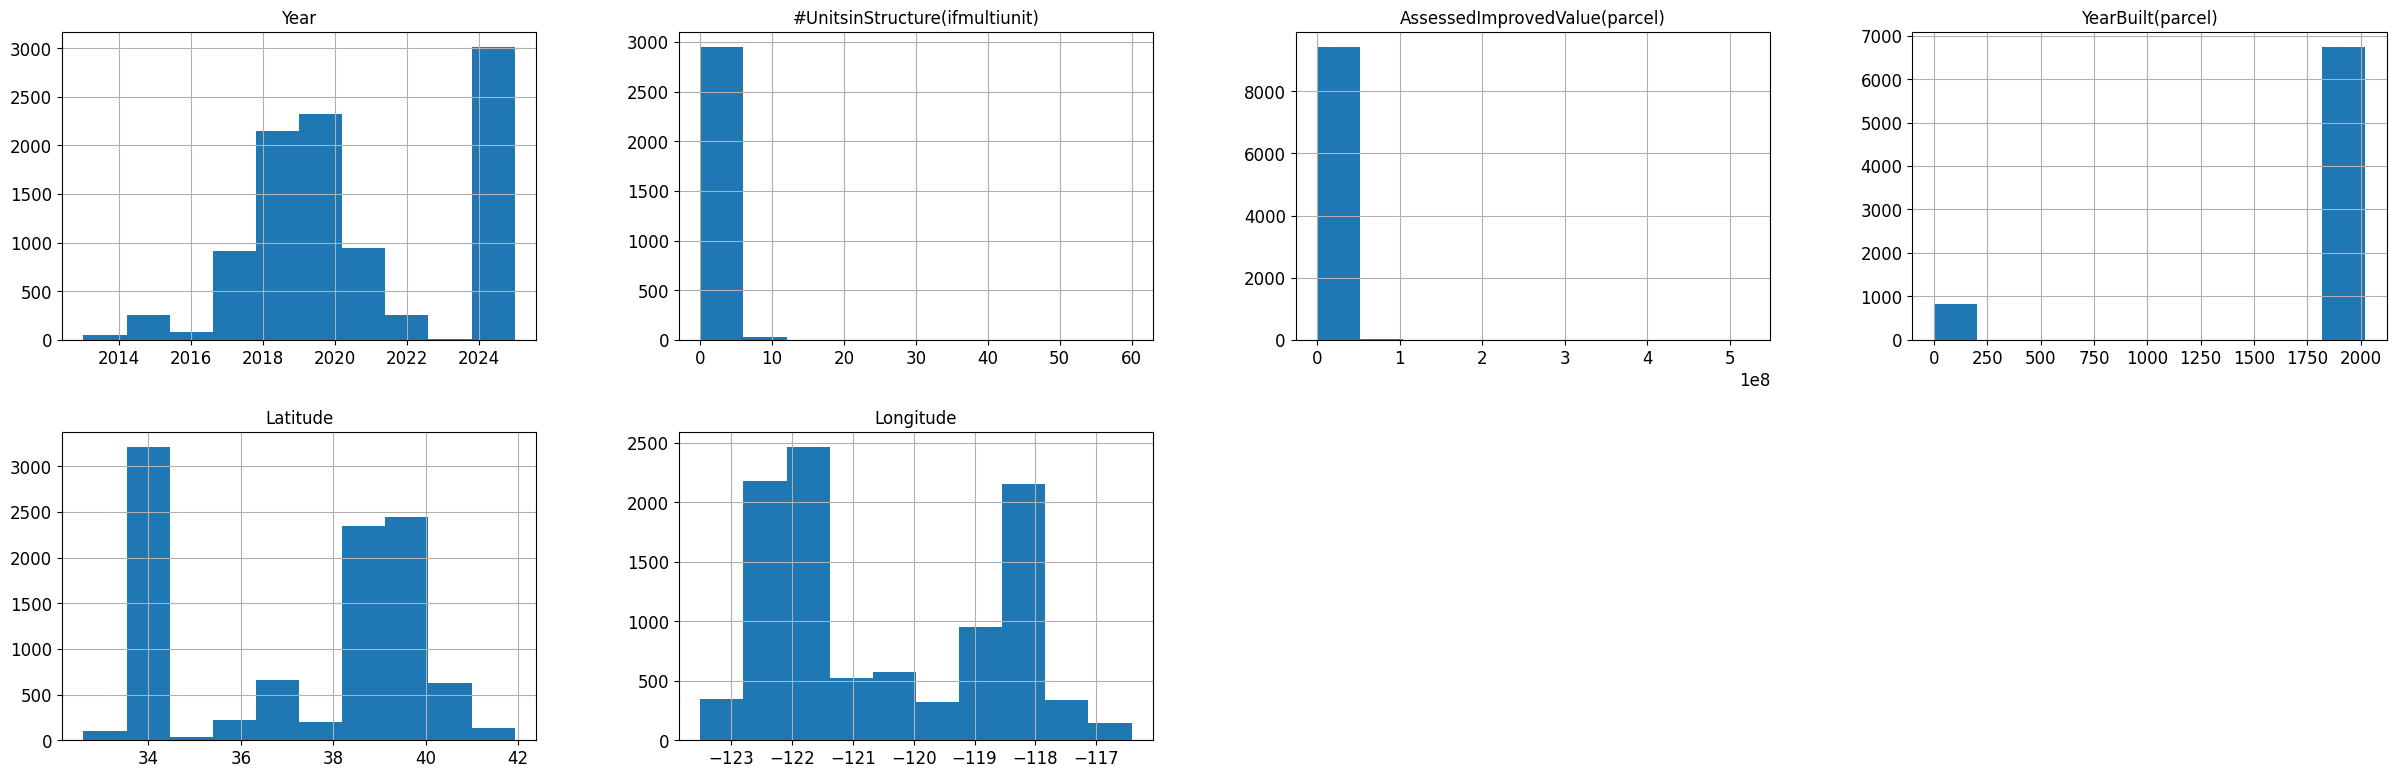

In [40]:
# Preprocess the IncidentStartDate column to extract the year
df['Year'] = df['IncidentStartDate'].dt.year
# Re-assign continuous_columns without 'IncidentStartDate' and include 'Year'
continuous_columns = [col if col != 'IncidentStartDate' else 'Year' for col in continuous_columns]

# Plot a histogram summary sheet of the continuous features and save in a png file
df[continuous_columns].hist(layout=(6, 4), figsize=(30,30), bins=10)
plt.savefig('continuous_histograms_1-1.pdf')




**Initial Findings**

**#UnitsinStructure** - Given that these histograms do not include nan values and that the mode of this feature '0' only equates to <3000 of the features values it is clear that the majority of the values of this feature are nan.

**YearBuilt(Parcel)** - There are a large number of '0' values for this feature which given that this feature represents years the zeroes more than likely represent unknown or missing values.

**Longitude / Latitude** - Both features have a multimodal distribution.

### 1.9 Plot Box Plots for Continuous Features

**Initial Findings**

**Outliers** - The features #UnitsinStructure(ifmultiunit), AssessedImprovedValue(parcel), YearBuilt(parcel) have a number of outliers.

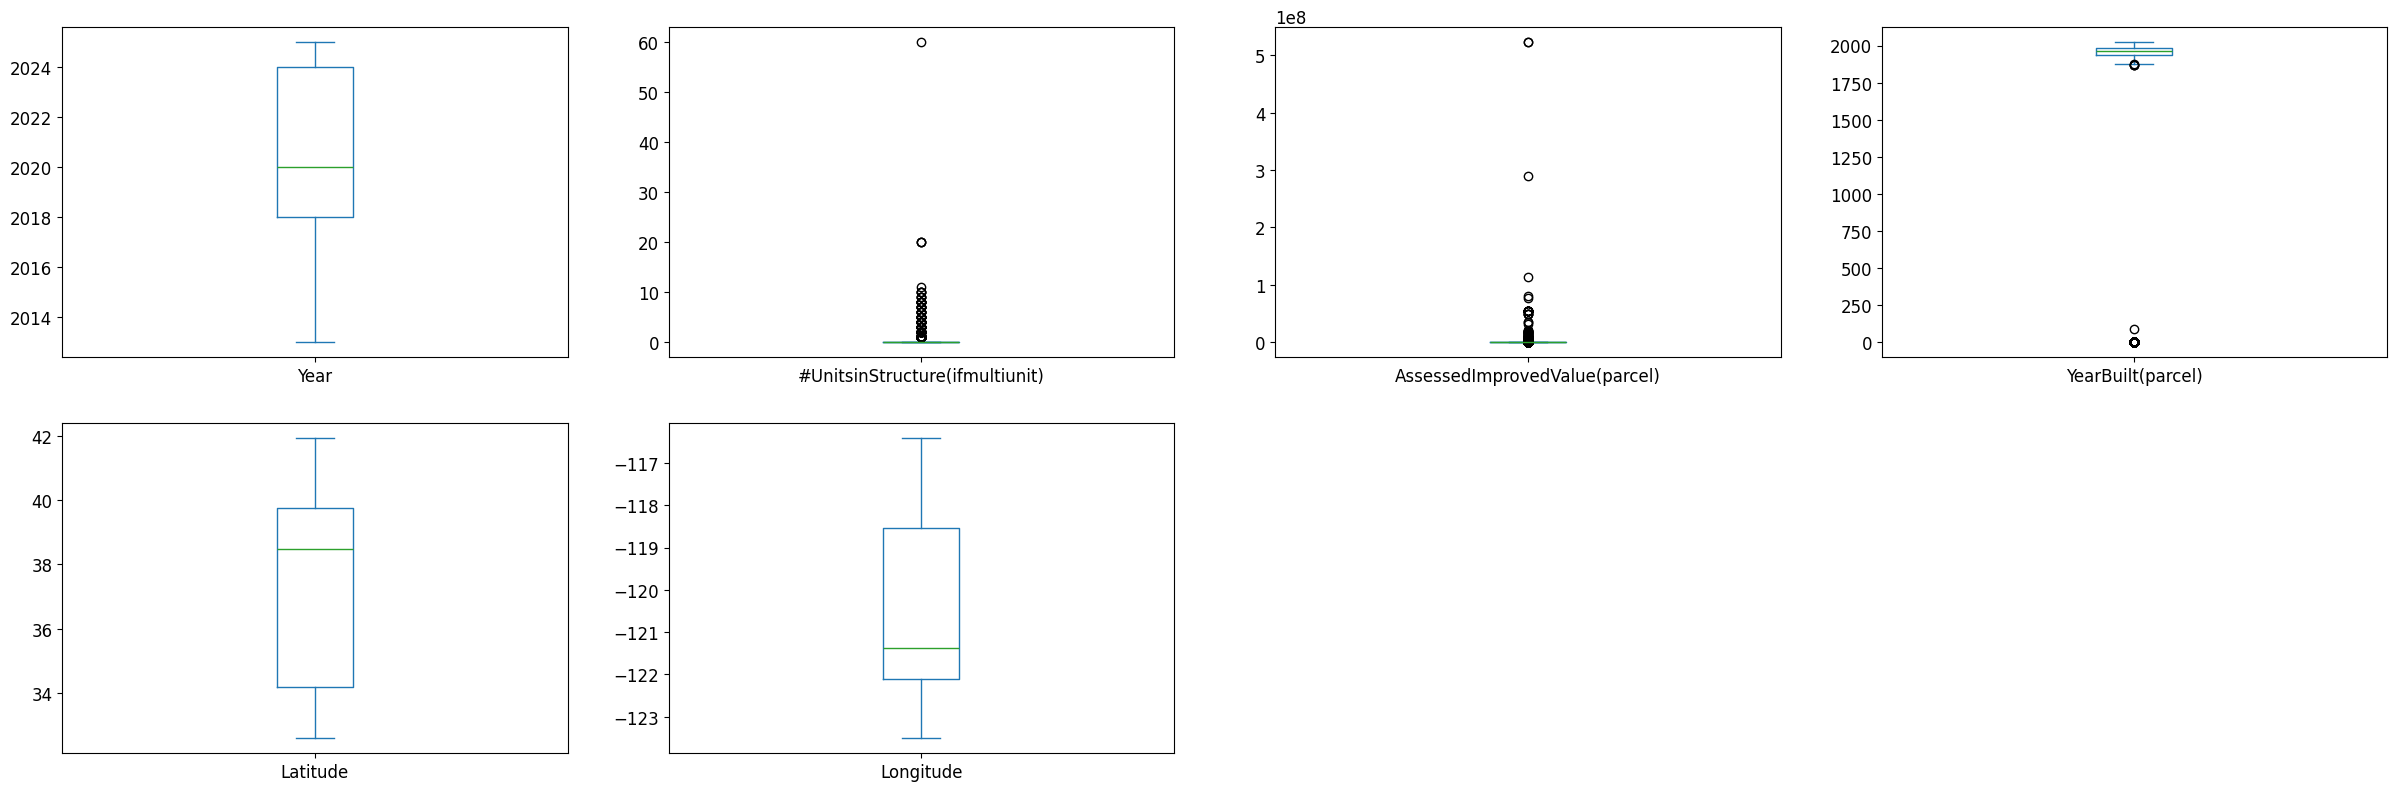

In [41]:
# Preprocess the IncidentStartDate column to extract the year
df['Year'] = df['IncidentStartDate'].dt.year

# Re-assign continuous_columns without 'IncidentStartDate' and include 'Year'
continuous_columns = [col if col != 'IncidentStartDate' else 'Year' for col in continuous_columns]

# Plot a boxplot summary sheet of the continuous features and save it in a pdf file
df[continuous_columns].plot(kind='box', subplots=True, figsize=(30,30), layout=(6,4), sharex=False, sharey=False)
plt.savefig('continuous_boxplots_summary1-1.pdf')

# Drop the 'Year' column after plotting, as it was only created for the box plot
df = df.drop(columns=['Year'])

### 1.10 - Plot Barplots for all Categorical Features

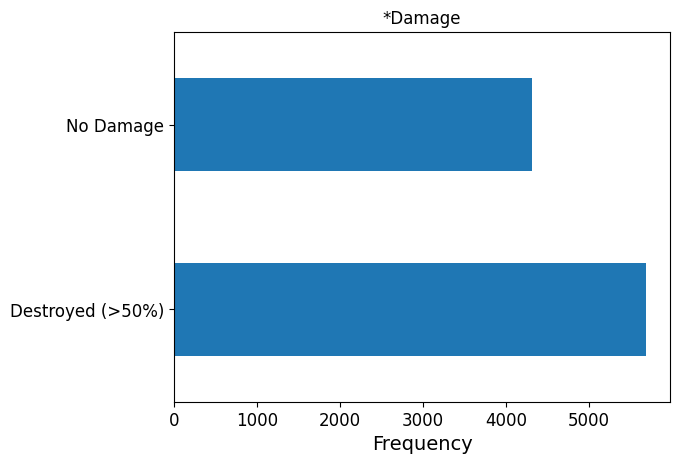

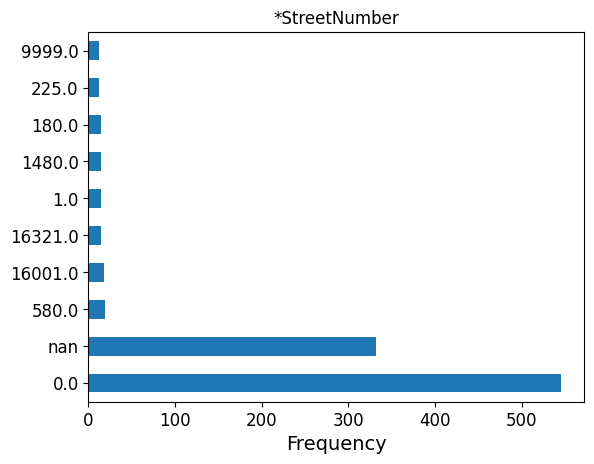

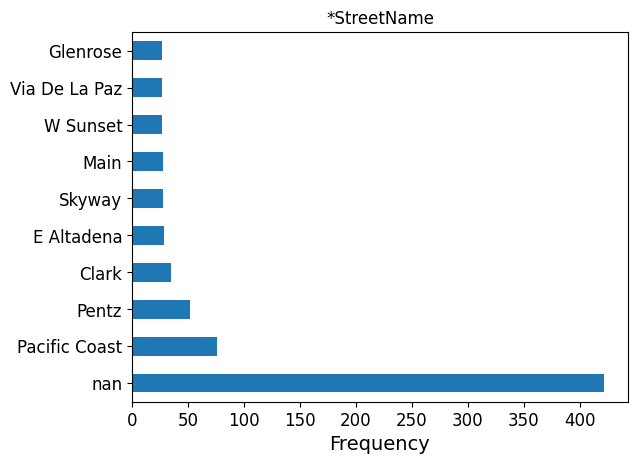

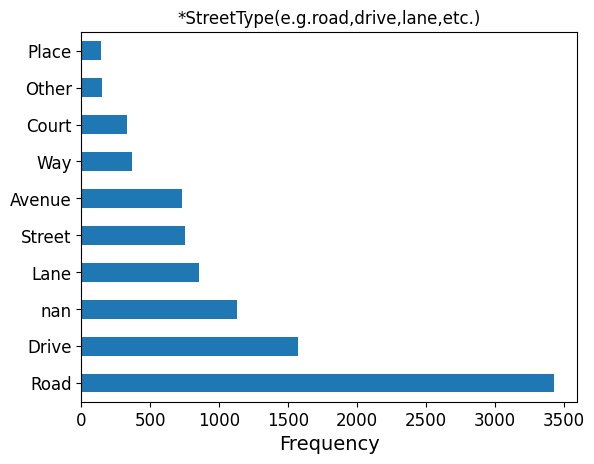

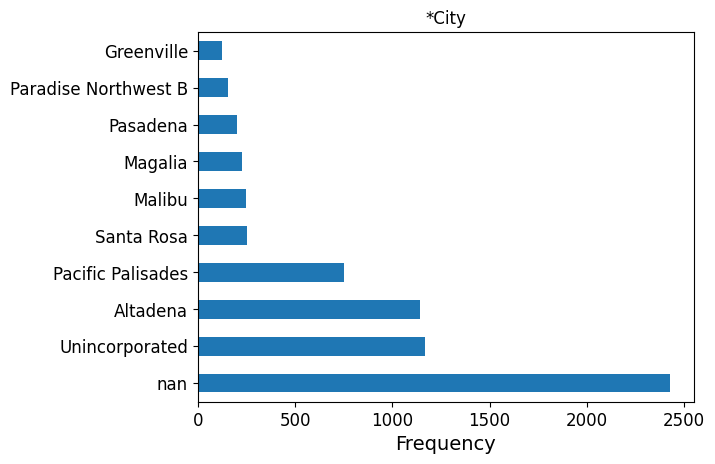

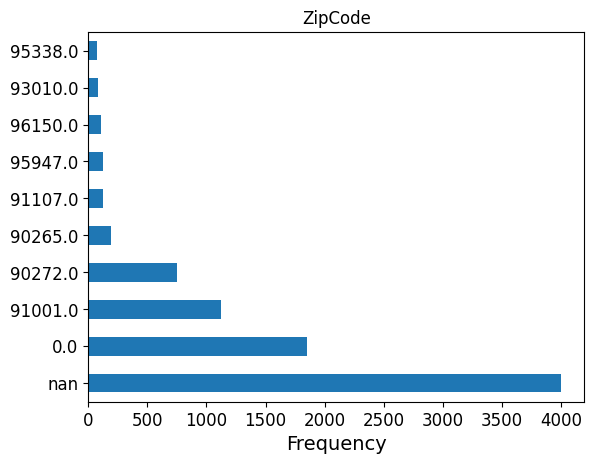

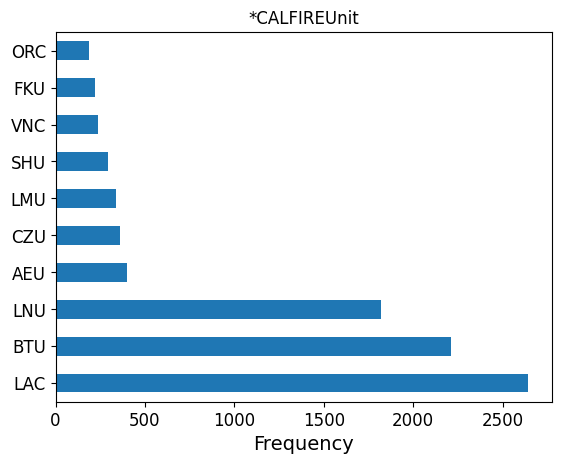

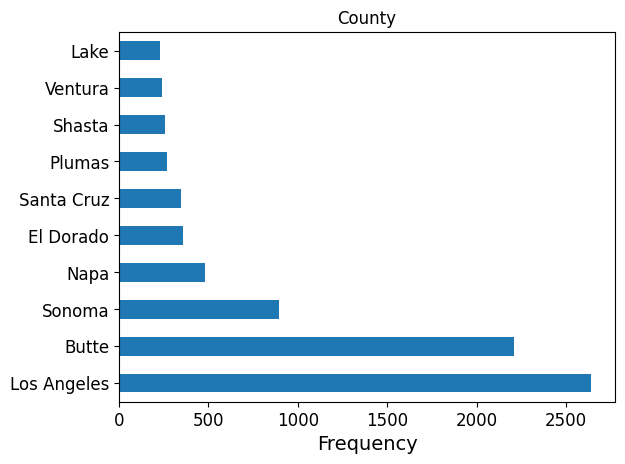

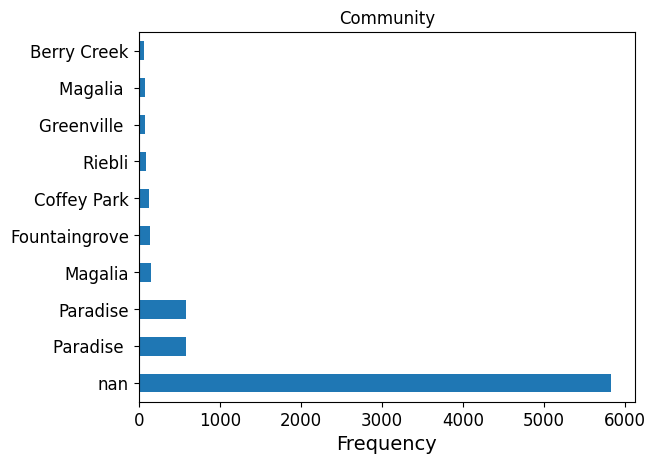

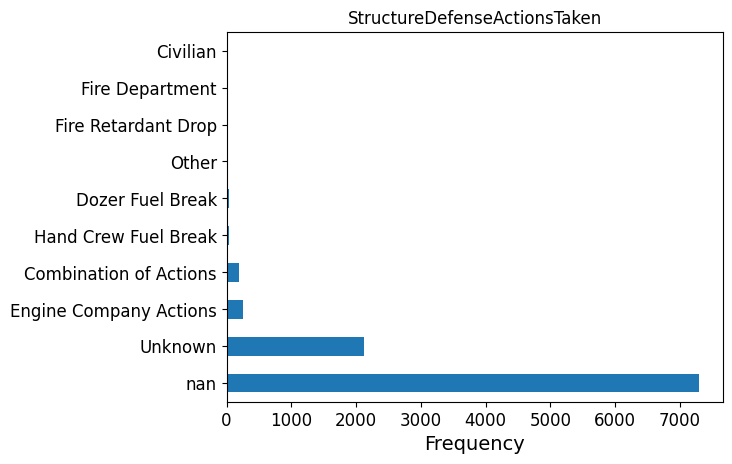

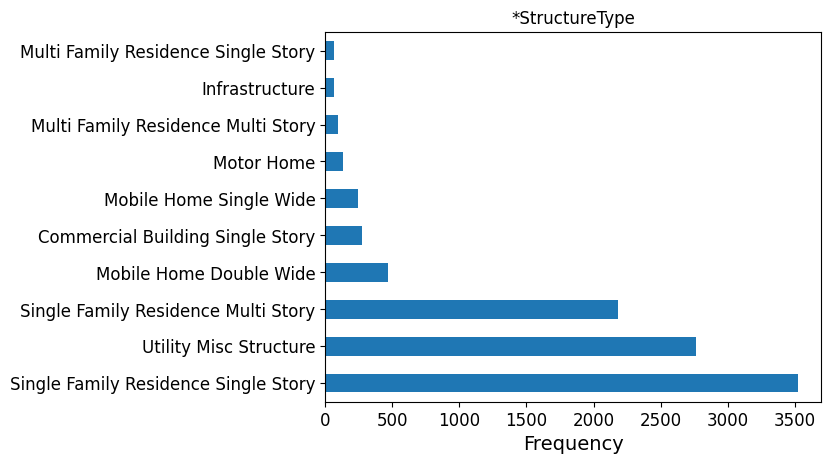

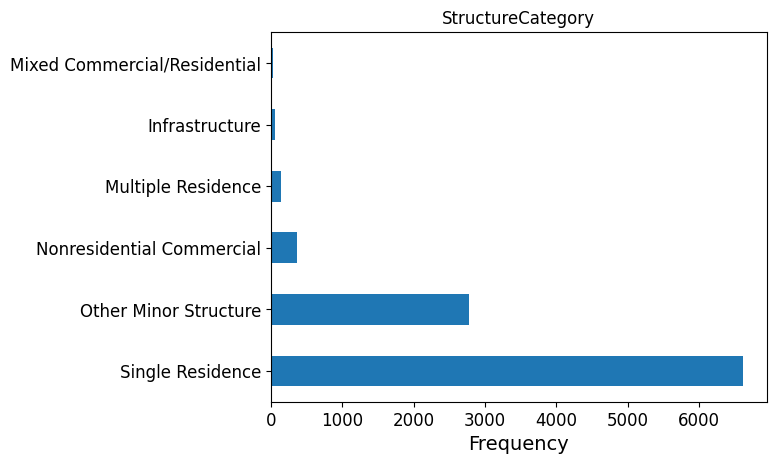

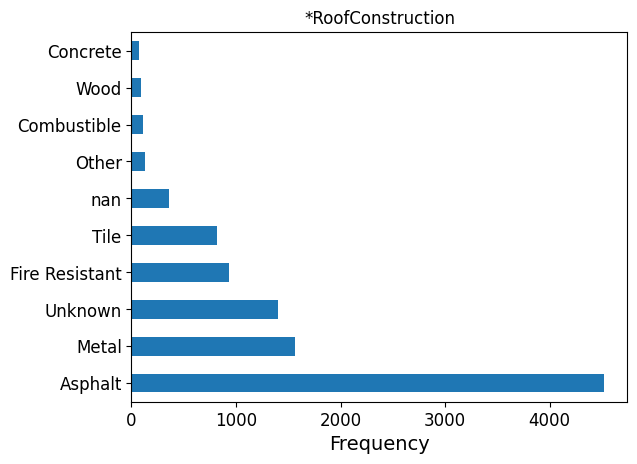

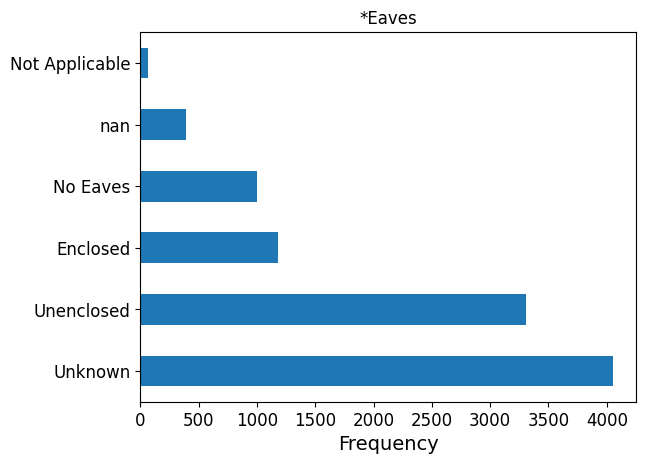

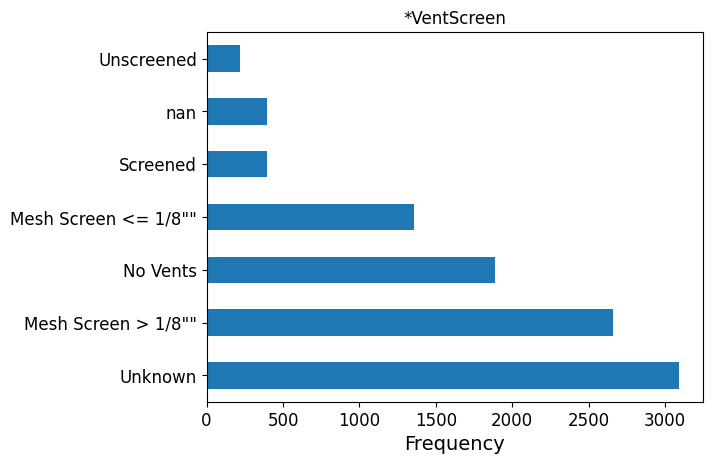

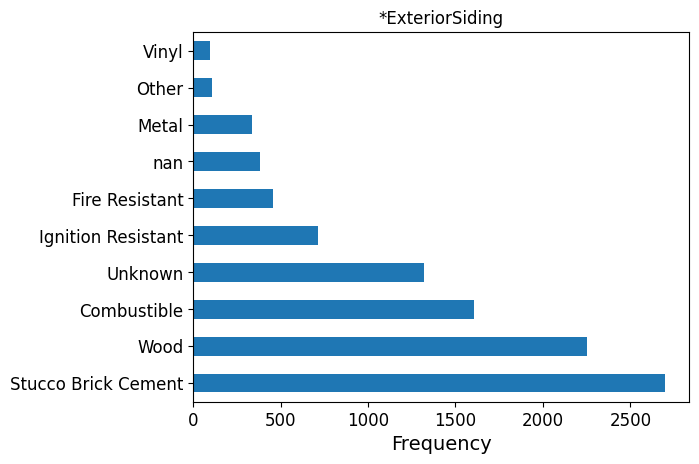

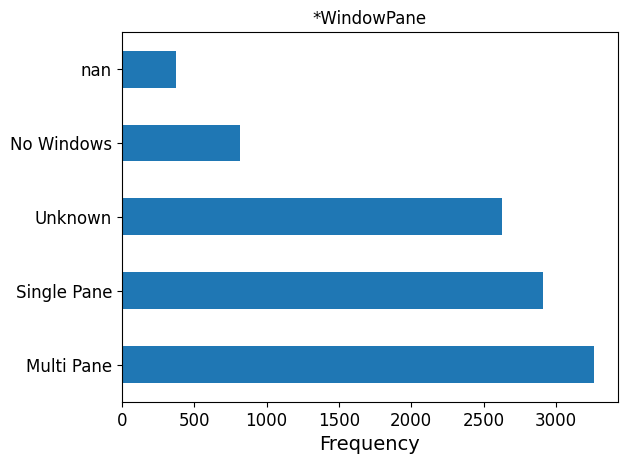

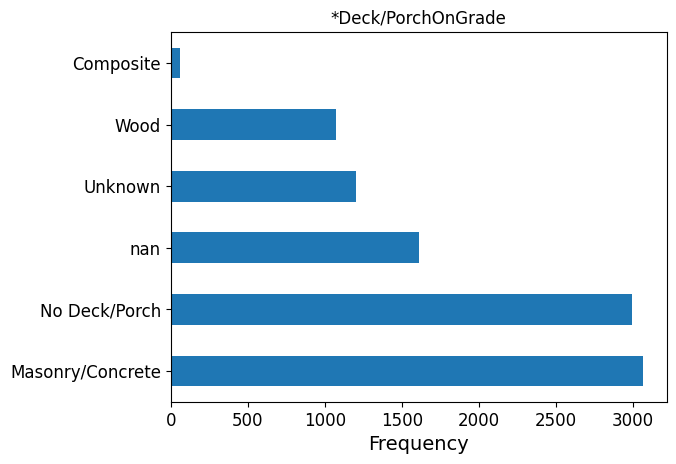

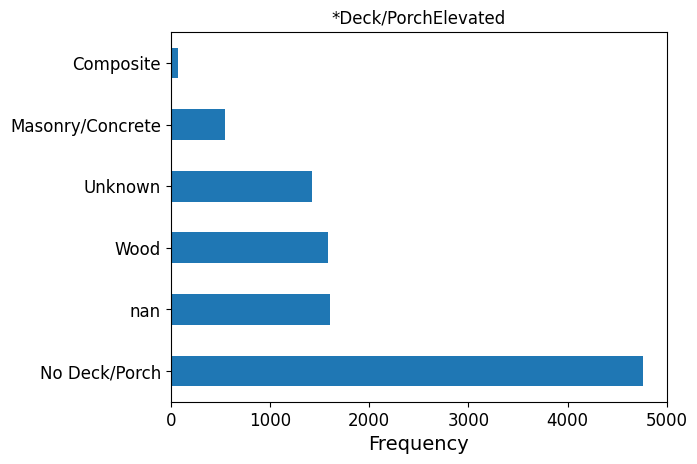

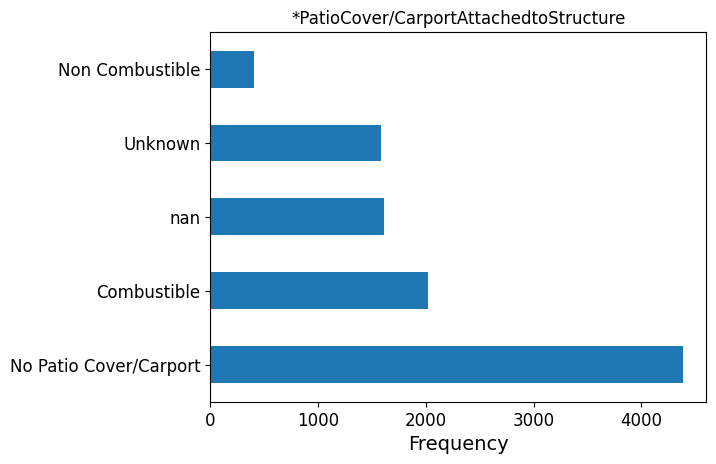

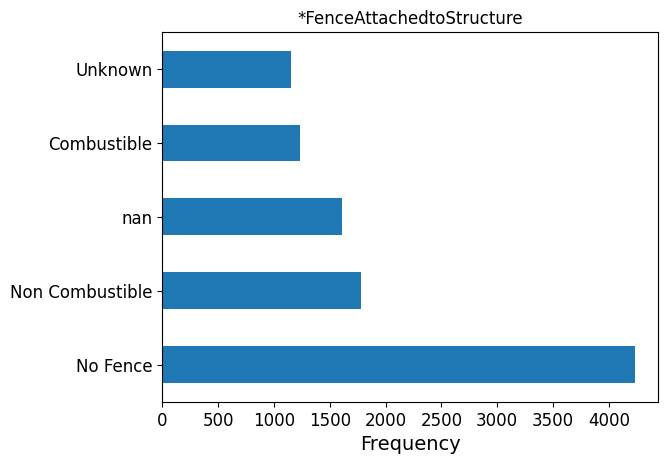

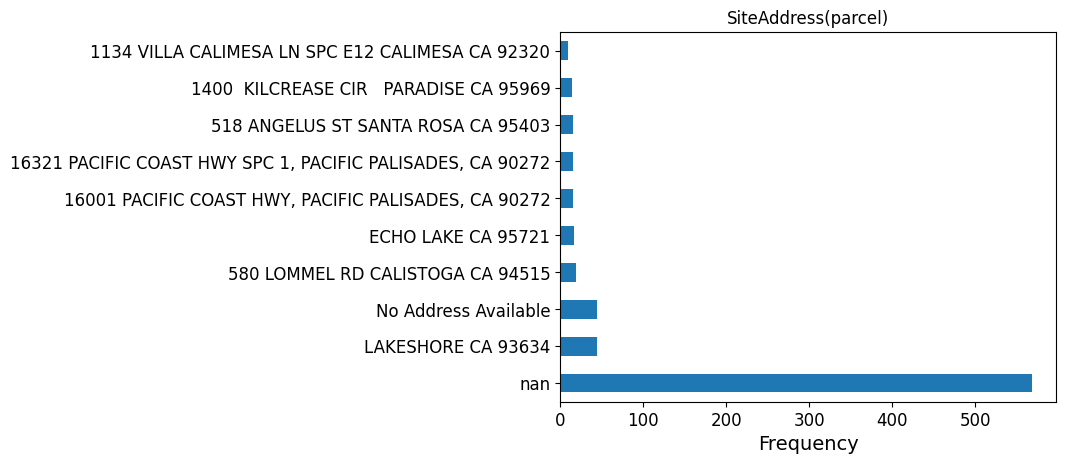

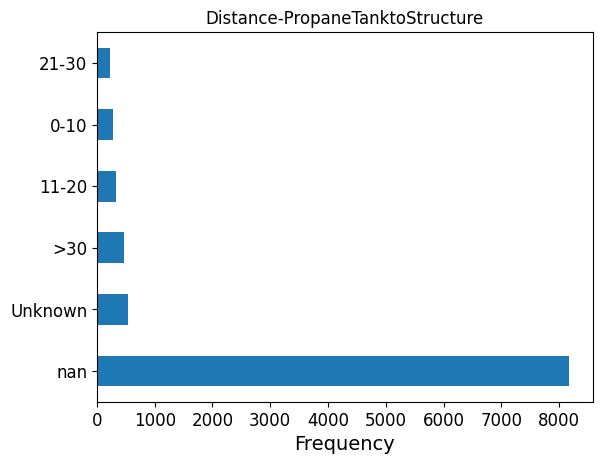

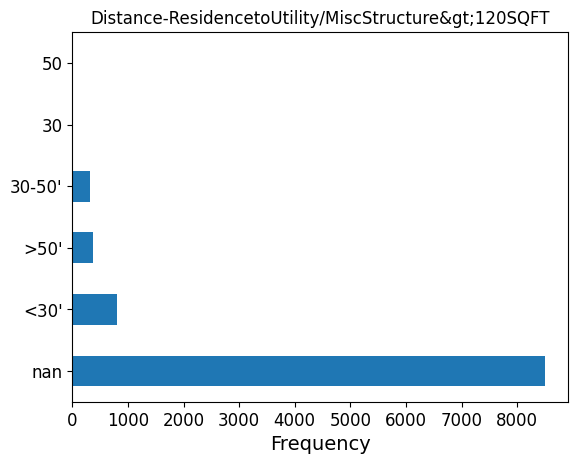

In [42]:
#Please note that due to the high cardinality of a number of features only the top 10 largest entries are displayed to improve readability.

for column in categorical_columns:
    top_10 = df[column].value_counts(dropna=False).nlargest(10)                                                                                                                       
    top_10.plot(kind='barh', title=column)
    plt.xlabel('Frequency')
    plt.ylabel('')
    plt.show()



### **Initial Findings**

**Cardinality** - All features have a cardinality > 1.

**Unknown Values** - The mode of a number of features - *VentScreen, *Eaves, StructureDefenseActionsTaken, ZipCode, *StreetNumber - is either unknown or 0. 

**Missing Values** - A number of features - *City, *Community, StructureDefenseActionsTaken, ZipCode, Distance-PropaneTanktoStructure, Distance-ResidencetoUtility/MiscStructure&gt;120SQFT - have a large number of missing values. Examples of features that have a large amount of missing values include Distance-PropaneTanktoStructure and Distance-ResidencetoUtility/MiscStructure&gt;120SQFT which both have over 80% missing values and StructureDefenseActionsTaken which has over 70%

*Further information can be found in the data quality report.*

## (2). Prepare a data quality plan for the cleaned CSV file. 


### 2.1 Analyse all features and mark down all the features where there are potential problems or data quality issues.

As per the DataQualityReport.pdf the following issues have been identified with the data set.

1. The columns 'State' and 'HazardType' are constant and have a cardinality of 1.
2. There is one duplicate row (entry with OBJECTID 74634).
3. The following categorical features have a missing value rate of between 58% - 84% ‘Community’, ‘StructureDefenseActionsTaken’, ‘Distance-PropaneTanktoStructure’ and ‘Distance-ResidencetoUtility/MiscStructure&gt;120SQFT’.
4. The continuous feature '#UnitsinStructure(ifmultiunit)' has over 70% missing values and is not of much utility in relation to our overall goal of predicting structural risk due to wildfires.
5. The majority of categorical features have NaN, unkown or '0' values present to some degree. 
6. The continuous features 'AssessedImprovedValue(parcel), 'YearBuilt(parcel) have a number of NaN or 0 values.

### 2.2 Propose solutions to deal with the problems identified. Explain why did you choose one solution over potentially many other. It is very important to provide justification for your thinking in this part and to list potential solutions, including the solution that will be implemented to clean the data.

As per the DataQualityReport.pdf the following solutions have been proposed to address the aformentioned data quality issues.

1. Drop constant columns ‘State’ and ‘HazardType’. As the cardinality of both features is 1 the presence of these columns is of little purpose and as a result to ensure data consistency they will both be dropped.
2. Drop the only duplicate row in the dataset (OBJECTID 74364). As this row is a duplicate value there is little reason to keep it and as a consquence is will be dropped.
3. Drop categorical features ‘Community’, ‘StructureDefenseActionsTaken’, ‘Distance-PropaneTanktoStructure’ and ‘Distance-ResidencetoUtility/MiscStructure&gt;120SQFT’ as at least 58% of each of these features are missing and the data present in each feature is either redundant or does not provide much utility in terms of predicting structural risk prevention. The decision was made to drop these feautures due to the high number of missing values and the fact that the incomplete data does not have much relevance in terms of our objective.
4. Drop continuous feature #UnitsinStructure(ifmultiunit) as it has over 70% missing value and is not of much benefit toward are objective.
5. For all categorical features the imputation of the value ‘Missing’ for all ‘Unknown’, ‘0’ or Nan values. The decision has been made to impute anyh NaN, '0' or 'Unknown' values with a comman value 'Missing' instead of inputing with the mean, mode or median as these features are not numerical and there values are labels. As a result, imputing the mean, median or mode with make little sense. Alongside this, imputing the mode may cause confususion as if someone was to review the feature 'County' and if a missing value was replaced with Los Angeles for example the person reviewing may believe that the incident actually occurred in Los Angeles which may not be the case.
6. For continuous features AssessedImprovedValue(parcel) and ‘YearBuilt’ the imputation of the mean value for any entries with NaN or ‘0’ values. As these features are numerical it makes sense to imput the mean value for every unknown, '0' or NaN value as in terms of probability the missing value is most likely to be similar to the mean. 

### 2.3 Apply your solutions to obtain a new CSV file where the identified data quality issues were addressed. 

1. Drop constant columns ‘State’ and ‘HazardType’.

As per the assignment brief both of these columns were dropped in section 1. Please see cell 1.5 for the implementation of this. 

2. Drop the only duplicate row in the dataset (OBJECTID 74364).

Once again this duplicate row has already been dropped from the dataset as per the instructions for section 1. Please review cell 1.4 to see the implementation of this.

3. Drop categorical features ‘Community’, ‘StructureDefenseActionsTaken’, ‘Distance-PropaneTanktoStructure’ and ‘Distance-ResidencetoUtility/MiscStructure&gt120SQFT’.

In [43]:

df = df.drop(columns=['Community', 'StructureDefenseActionsTaken', 'Distance-PropaneTanktoStructure', 'Distance-ResidencetoUtility/MiscStructure&gt;120SQFT'])

# verifying that the features in question have been dropped by printing all features in the dataframe.
df.dtypes

OBJECTID                                          object
*Damage                                         category
*StreetNumber                                   category
*StreetName                                     category
*StreetType(e.g.road,drive,lane,etc.)           category
*City                                           category
ZipCode                                         category
*CALFIREUnit                                    category
County                                          category
IncidentStartDate                         datetime64[ns]
*StructureType                                  category
StructureCategory                               category
#UnitsinStructure(ifmultiunit)                     Int64
*RoofConstruction                               category
*Eaves                                          category
*VentScreen                                     category
*ExteriorSiding                                 category
*WindowPane                    

4. Drop continuous feature #UnitsinStructure(ifmultiunit)

In [44]:
df = df.drop(columns=['#UnitsinStructure(ifmultiunit)'])

# verifying that the feature has been dropped.
df.dtypes

OBJECTID                                          object
*Damage                                         category
*StreetNumber                                   category
*StreetName                                     category
*StreetType(e.g.road,drive,lane,etc.)           category
*City                                           category
ZipCode                                         category
*CALFIREUnit                                    category
County                                          category
IncidentStartDate                         datetime64[ns]
*StructureType                                  category
StructureCategory                               category
*RoofConstruction                               category
*Eaves                                          category
*VentScreen                                     category
*ExteriorSiding                                 category
*WindowPane                                     category
*Deck/PorchOnGrade             

5. For all categorical features the imputation of the value ‘Missing’ for all ‘Unknown’, ‘0’ or Nan values to ensure data consistency.

In [45]:
# Update the categorical columns variable and remove the dropped features.
categorical_columns = df[['*Damage', '*StreetNumber', '*StreetName', '*StreetType(e.g.road,drive,lane,etc.)', '*City', 'ZipCode', '*CALFIREUnit', 
                          'County', '*StructureType', 'SiteAddress(parcel)', 'StructureCategory', '*RoofConstruction', '*Eaves', '*VentScreen', '*ExteriorSiding', '*WindowPane', 
                          '*Deck/PorchOnGrade', '*Deck/PorchElevated', '*PatioCover/CarportAttachedtoStructure', '*FenceAttachedtoStructure']].columns

# Replace any 0, 'Unknown' with nan.

df[categorical_columns] = df[categorical_columns].replace(['0', 0, 0.0], 'Unknown')
df[categorical_columns] = df[categorical_columns].replace(['Unknown'], np.nan)    

for col in categorical_columns:
    # Check if 'Missing' is already a category
    if 'Missing' not in df[col].cat.categories:
        df[col] = df[col].cat.add_categories(['Missing'])

# Step 3: Replace NaN values with 'Missing'
df[categorical_columns] = df[categorical_columns].fillna('Missing')

#Verify that there are no nan values in the categorical features.
null_check = df[categorical_columns].isnull().any()
print("Null values still present in columns:\n", null_check)



Null values still present in columns:
 *Damage                                   False
*StreetNumber                             False
*StreetName                               False
*StreetType(e.g.road,drive,lane,etc.)     False
*City                                     False
ZipCode                                   False
*CALFIREUnit                              False
County                                    False
*StructureType                            False
SiteAddress(parcel)                       False
StructureCategory                         False
*RoofConstruction                         False
*Eaves                                    False
*VentScreen                               False
*ExteriorSiding                           False
*WindowPane                               False
*Deck/PorchOnGrade                        False
*Deck/PorchElevated                       False
*PatioCover/CarportAttachedtoStructure    False
*FenceAttachedtoStructure                 False
d

/tmp/ipykernel_73718/340982533.py:8: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df[categorical_columns] = df[categorical_columns].replace(['0', 0, 0.0], 'Unknown')
/tmp/ipykernel_73718/340982533.py:8: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df[categorical_columns] = df[categorical_columns].replace(['0', 0, 0.0], 'Unknown')
/tmp/ipykernel_73718/340982533.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to th

In [46]:
#Verify that there are no longer any zero or unknown values in the categorical features.
remaining_zeros = df[categorical_columns].isin (['0', 0, 0.0, 'Unknown']).any()
print("Remaining '0' values in columns:\n", remaining_zeros)

Remaining '0' values in columns:
 *Damage                                   False
*StreetNumber                             False
*StreetName                               False
*StreetType(e.g.road,drive,lane,etc.)     False
*City                                     False
ZipCode                                   False
*CALFIREUnit                              False
County                                    False
*StructureType                            False
SiteAddress(parcel)                       False
StructureCategory                         False
*RoofConstruction                         False
*Eaves                                    False
*VentScreen                               False
*ExteriorSiding                           False
*WindowPane                               False
*Deck/PorchOnGrade                        False
*Deck/PorchElevated                       False
*PatioCover/CarportAttachedtoStructure    False
*FenceAttachedtoStructure                 False
dtype:

6. For continuous features AssessedImprovedValue(parcel) and ‘YearBuilt’ the imputation of the mean value for any entries with NaN or ‘0’ values.

In [47]:
#Assessed Improved Value.
df['AssessedImprovedValue(parcel)'] = df['AssessedImprovedValue(parcel)'].replace([0, 0.0, '0'], np.nan)

# Calculate the means feature without the 0 values.
improvedvalue_mean = round(df['AssessedImprovedValue(parcel)'].mean(), 2)

df['AssessedImprovedValue(parcel)'] = df['AssessedImprovedValue(parcel)'].fillna(improvedvalue_mean)

null_check = df['AssessedImprovedValue(parcel)'].isnull().any()
print("Null values still present in the feature?:", null_check)

#Verify that there are no longer any zero or unknown values in the categorical features.
remaining_zeros = df['AssessedImprovedValue(parcel)'].isin (['0', 0, 0.0, 'Unknown']).any()
print("Are there any remaining '0' or unknown values in this feature:", remaining_zeros)

df['AssessedImprovedValue(parcel)'].to_csv("assessedimprovedvalue.csv")


Null values still present in the feature?: False
Are there any remaining '0' or unknown values in this feature: False


In [48]:
#YearBuilt(parcel)
df['YearBuilt(parcel)'] = df['YearBuilt(parcel)'].replace([0, 0.0, '0', 89], np.nan)

# Calculate the means feature without the 0 values as they were skewing the result.
improvedvalue_mean = round(df['YearBuilt(parcel)'].mean(), 0)

df['YearBuilt(parcel)'] = df['YearBuilt(parcel)'].fillna(improvedvalue_mean)

null_check = df['YearBuilt(parcel)'].isnull().any()
print("Null values still present in the feature?:", null_check)

#Verify that there are no longer any zero or unknown values in the categorical features.
remaining_zeros = df['YearBuilt(parcel)'].isin (['0', 0, 0.0, 'Unknown']).any()
print("Are there any remaining '0' or unknown values in this feature:", remaining_zeros)

df['YearBuilt(parcel)'].to_csv("YearBuilt(parcel).csv")


Null values still present in the feature?: False
Are there any remaining '0' or unknown values in this feature: False


### 2.7  Save the new CSV file with a self explanatory name. Save the data quality plan to a single PDF file.

The below data quality plan has been saved to PDF DataQualityPlan.pdf.

### Data quality plan:

| Variable Names                     | Data Quality Issue            | Handling Strategy              |
|------------------------------------|-------------------------------|--------------------------------|
| OBJECTID                           | N/A                           | Do Nothing                     |
| * Damage                           | N/A                           | Do Nothing                     |
| * Street Number                    | nan / '0' values              | Replace with 'Missing'         |
| * Street Name                      | nan values                    | Replace with 'Missing'         |
| * Street Type (e.g. road, drive, lane, etc.)| nan values           | Replace with 'Missing'         |
| * City                             | nan values                    | Replace with 'Missing'         |
| State                              | Constant                      | Drop feature                   |
| Zip Code                           | nan / '0' values              | Replace with 'Missing'         |
| * CAL FIRE Unit                    | N/A                           | Do Nothing                     |
| County                             | N/A                           | Do Nothing                     |
| Community                          | 58.29% nan values             | Drop Feature                   |
| Incident Start Date                | N/A                           | Do Nothing                     |
| Hazard Type                        | Constant                      | Drop Feature                   |
| Structure Defense Actions Taken    | 72.98% nan values             | Drop Feature                   |
| * Structure Type                   | N/A                           | Do Nothing                     |
| Structure Category                 | N/A                           | Do Nothing                     |
| # Units in Structure (if multi unit)| Outliers / 70.1 nan values   | Drop Feature                   |
| * Roof Construction                | nan /'unknown' values         | Replace with 'Missing'         |
| * Eaves                            | nan /'unknown' values         | Replace with 'Missing'         |
| * Vent Screen                      | nan /'unknown' values         | Replace with 'Missing'         |
| * Exterior Siding                  | nan /'unknown' values         | Replace with 'Missing'         |
| * Window Pane                      | nan /'unknown' values         | Replace with 'Missing'         |
| * Deck/Porch On Grade              | nan /'unknown' values         | Replace with 'Missing'         |
| * Deck/Porch Elevated              | nan /'unknown' values         | Replace with 'Missing'         |
| * Patio Cover/Carport Attached to Structure           | nan /'unknown' values  | Replace with 'Missing'             |
| * Fence Attached to Structure      | nan /'unknown' values         | Replace with 'Missing'         |
| Distance - Propane Tank to Structure         | 81.8% nan values     | Drop Feature                   |
| Distance - Residence to Utility/Misc Structure &gt; 120 SQFT         | 84.97%                      | Drop Feature                     |
| Assessed Improved Value (parcel)   | nan / '0' values              | Replace with mean              |
| Year Built (parcel)                | Outliers / nan / '0' values   | Replace with mean              |
| Site Address (parcel)              | nan values                    | Replace with 'Missing'         |
| Latitude                           | N/A                           | Do Nothing                     |
| Longitude                          | N/A                           | Do Nothing                     |

The final cleaned data set has been saved to "cal-wildfires-24241048-clean-Final.csv"

In [49]:
df.to_csv("cal-wildfires-24241048-clean-Final.csv")


## (3). [15] Exploring relationships between feature pairs.


### Choose a subset of features you find promising and plot pairwise feature interactions (e.g., continuous-continuous feature plot or continuous-categorical plots or correlation plots). Explain your choices.

I have chosen to plot pairwise feature interactions of the following features.

**Continuous-Categorical Feature Plots**

- *Damage vs. *YearBuilt(parcel)
- *Damage vs. AssessedImprovedValue(parcel)

I have chosen to examine these features as given that our aspiration is to predict structural risk it is important to understand if older structures are more susceptible to damage in comparison to new structures. Alongside this it is important to understand if structures that have a higher improved value are at more risk of damage then structures which have little improved value.

**Categorical-Categorical Feature Plots**

- *Damage vs. *StructureType
- *Damage vs. *RoofConstruction
- *Damage vs. *Eaves
- *Damage vs. *VentScreen
- *Damage vs. *ExteriorSiding
- *Damage vs. *Deck/PorchOnGrade
- *Damage vs. *Deck/PorchElevated
- *Damage vs. *PatioCover/CarportAttachedtoStructure
- *Damage vs. *FenceAttachedtoStructure

I have chosen to compare *Damage against multiple features which relate to the contrusction and the type of structure itself as this will help us understand which type of structures are most at risk of fire damage, which will assist us greatly in predicting and ultimately preventing structural damage due to wild fires.



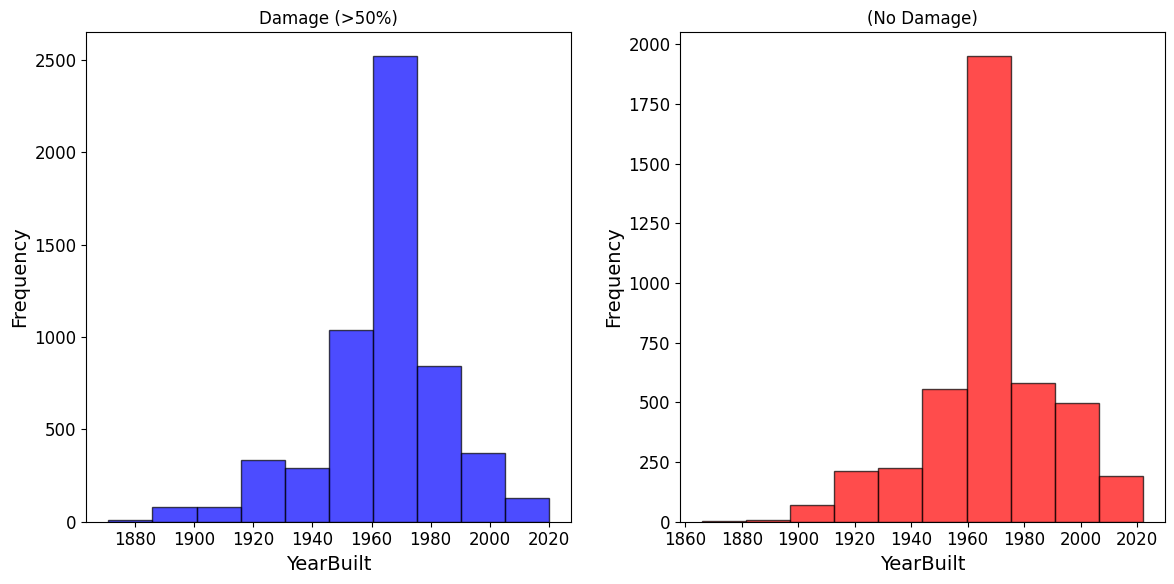

In [50]:
## Filter data frame so that it only contains entries where the damage feature == 'No Damage' and assign this to a new variable.
df_no_damage = df[df['*Damage'] == 'No Damage']

## Filter data frame so that it only contains entries where the damage feature == 'Destroyed (>50%)' and assign this to a new variable.
df_damage = df[df['*Damage'] == 'Destroyed (>50%)']


# Plotting histograms for Damage = 'Yes' and Damage = 'No' in separate subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Histogram for structures with Damage = 'Yes'
axs[0].hist(df_damage['YearBuilt(parcel)'], bins=10, alpha=0.7, color='blue', edgecolor='black')
axs[0].set_title('Damage (>50%)')
axs[0].set_xlabel('YearBuilt')
axs[0].set_ylabel('Frequency')

# Histogram for structures with Damage = 'No'
axs[1].hist(df_no_damage['YearBuilt(parcel)'], bins=10, alpha=0.7, color='red', edgecolor='black')
axs[1].set_title('(No Damage)')
axs[1].set_xlabel('YearBuilt')
axs[1].set_ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

We can see that the majority of structures in the dataset were constructed between 1960 and 1980 so we must be careful when considering the high frequency of these structures in both histograms. Alongside this there is overall a low number of structures present that were constructed prior to the the 1940s which makes sense. In terms of structures constructed after 2000 it is interesting to note that there were more homes not damaged then destroyed for homes constructed from 2000 onward. This could be indicative of the benefit of modern building techniques and efficiencys that will minimize the impact of fire damage such as fire resistant roofs etc... 

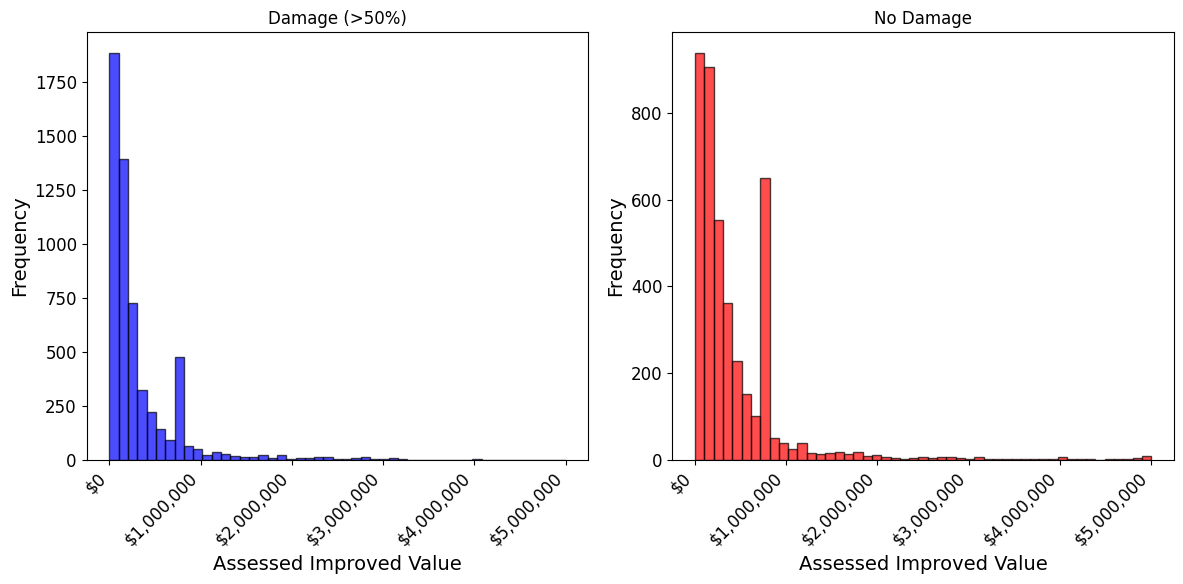

In [ ]:
# Please note that I am applying a threshold of $5000000 as houses in this range make up the majority and any houses outside of this range are outliers.
threshold = 5000000
df_damage_clipped = df_damage[df_damage['AssessedImprovedValue(parcel)'] <= threshold]
df_no_damage_clipped = df_no_damage[df_no_damage['AssessedImprovedValue(parcel)'] <= threshold]

bins = np.linspace(0, threshold, 50)  

# Plotting histograms for Damage = 'Yes' and Damage = 'No' in separate subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Histogram for structures with Damage = 'Yes'
n, bins, patches = axs[0].hist(df_damage_clipped['AssessedImprovedValue(parcel)'], bins=bins, alpha=0.7, color='blue', edgecolor='black')
axs[0].set_title('Damage (>50%)')
axs[0].set_xlabel('Assessed Improved Value')
axs[0].set_ylabel('Frequency')

# Histogram for structures with Damage = 'No'
n, bins, patches = axs[1].hist(df_no_damage_clipped['AssessedImprovedValue(parcel)'], bins=bins, alpha=0.7, color='red', edgecolor='black')
axs[1].set_title('No Damage')
axs[1].set_xlabel('Assessed Improved Value')
axs[1].set_ylabel('Frequency')


axs[0].set_xticks(np.linspace(0, threshold, 6)) 
axs[0].set_xticklabels([f"${int(x):,}" for x in np.linspace(0, threshold, 6)])  

axs[1].set_xticks(np.linspace(0, threshold, 6))  
axs[1].set_xticklabels([f"${int(x):,}" for x in np.linspace(0, threshold, 6)])  

# Rotating for better readability and to prevent overlap.
for ax in axs:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')

plt.tight_layout()
plt.show()

In terms of the comparison made between *Damage vs. AssessedImprovedValue(parcel)  we can see that it appears that structures that have an improved value of less than $400,000 make up the majority of the structures in question. While more structures in this feature surived than did not I do not believe this fact is of much utility in terms of our purpose of trying to reduce the risk of structural damage due to wild fires. If the feature was to provide specific information on how each structure was improved this would be much more helpful for our purposes as it would help us understand what types of structural improvements would help mitigate the risk of damage. 

### Barplots of the categorical features.

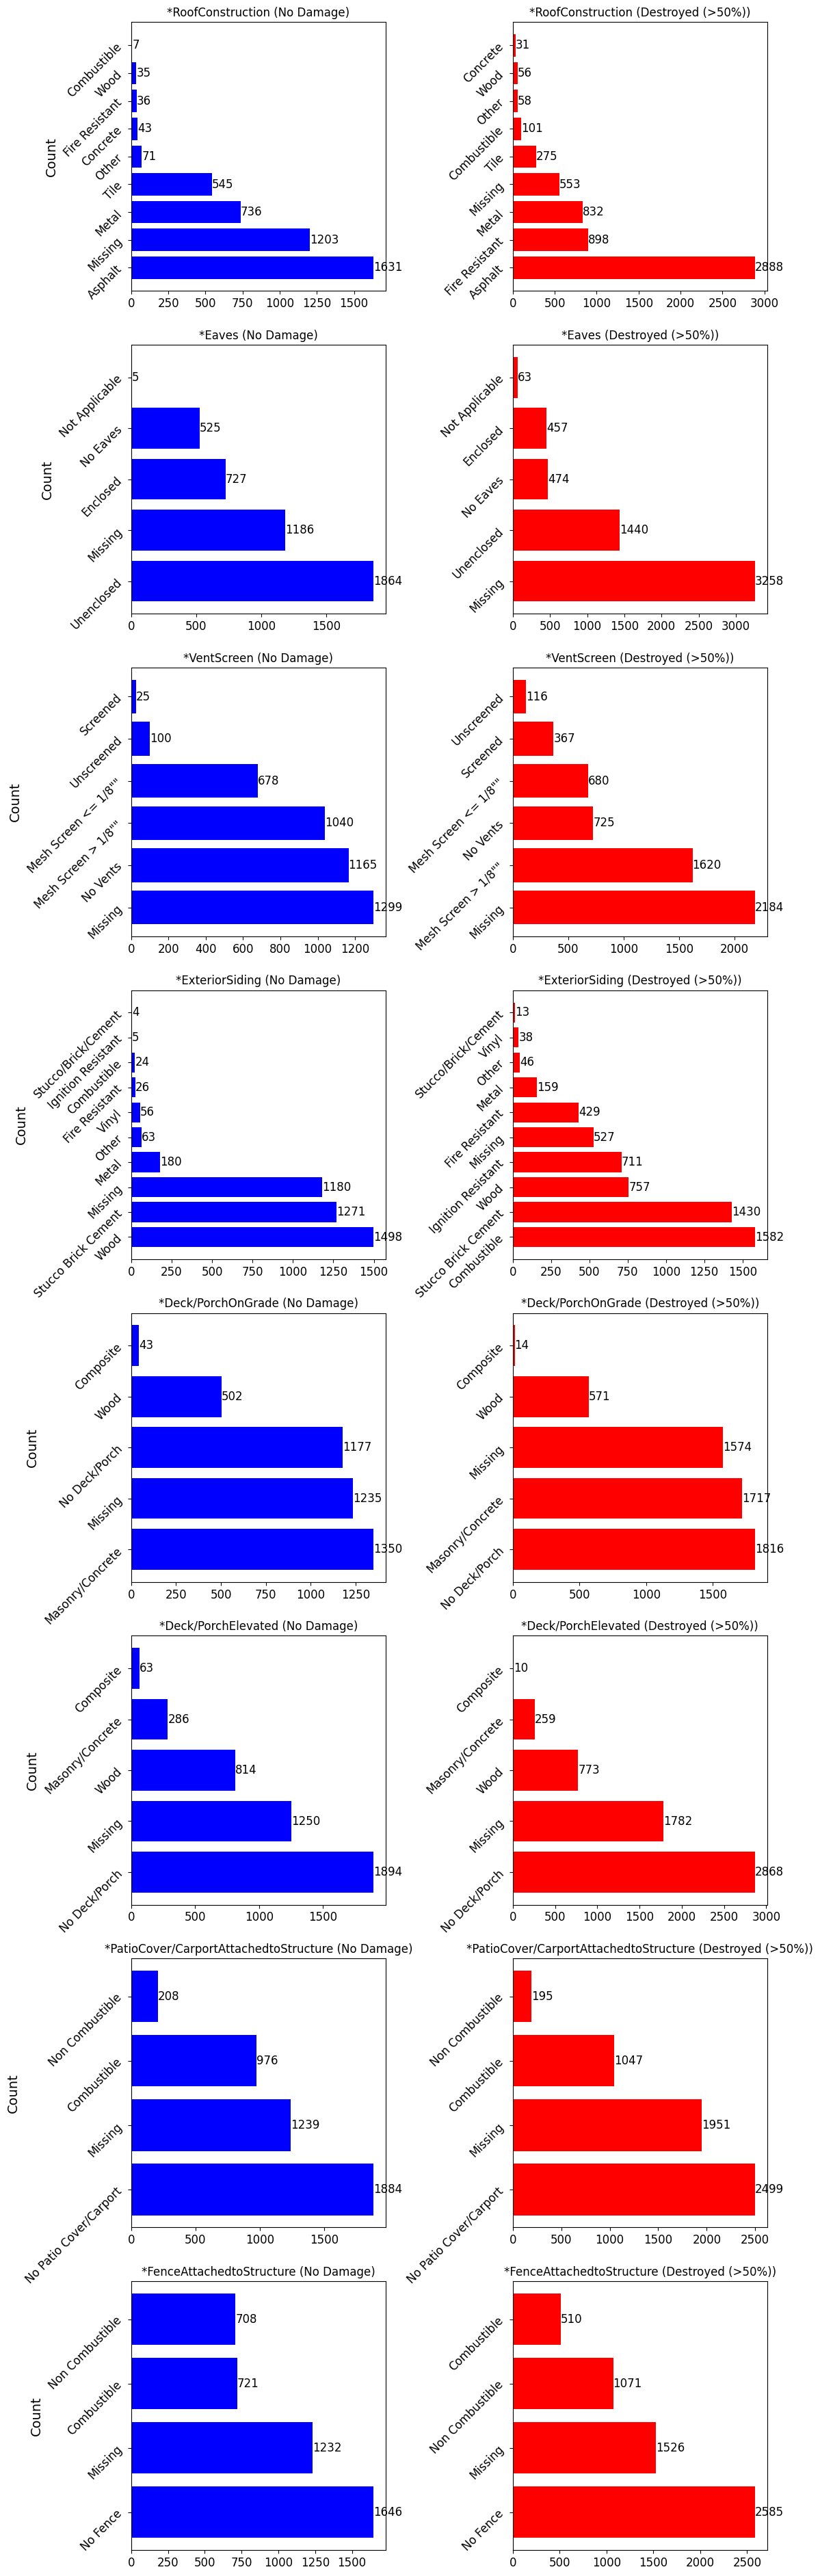

In [ ]:
# Defining a variable that contains the structural columns we will be examining.
structural_features = df[['*RoofConstruction', '*Eaves', '*VentScreen', '*ExteriorSiding', 
                          '*Deck/PorchOnGrade', '*Deck/PorchElevated', '*PatioCover/CarportAttachedtoStructure', 
                          '*FenceAttachedtoStructure']].columns

# Filter the data for Damage == 'No Damage' and Damage == 'Destroyed (>50%)'
df_no_damage = df[df['*Damage'] == 'No Damage']
df_damage = df[df['*Damage'] == 'Destroyed (>50%)']

# Create subplots
fig, axs = plt.subplots(len(structural_features), 2, figsize=(12, len(structural_features) * 6))

# Loop through each structural feature and plot side-by-side bar plots for No Damage and Destroyed
for i, column in enumerate(structural_features):
    # For No Damage
    df_no_damage_count = df_no_damage[column].value_counts()
    axs[i, 0].barh(df_no_damage_count.index, df_no_damage_count.values, color='blue')

    # Add count labels to the bars
    for bar in axs[i, 0].barh(df_no_damage_count.index, df_no_damage_count.values, color='blue'):
        axs[i, 0].text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, 
                       int(bar.get_width()), va='center', ha='left')
    
    axs[i, 0].set_title(f'{column} (No Damage)')
    axs[i, 0].set_ylabel('Count')
    axs[i, 0].tick_params(axis='y', rotation=45)

    # For Destroyed (>50%)
    df_damage_count = df_damage[column].value_counts()
    axs[i, 1].barh(df_damage_count.index, df_damage_count.values, color='red')

    # Add count labels to the bars
    for bar in axs[i, 1].barh(df_damage_count.index, df_damage_count.values, color='red'):
        axs[i, 1].text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, 
                       int(bar.get_width()), va='center', ha='left')
    
    axs[i, 1].set_title(f'{column} (Destroyed (>50%))')
    axs[i, 1].tick_params(axis='y', rotation=45)

plt.tight_layout
fig.subplots_adjust(wspace=0.5)
plt.show()


*Damage vs. Roof Construction

-High number of asphalt roofs in both the damaged and no damage bar plots. Most likely indicative of the fact that asphalt is the mode of this feature. Interesting to note that a large number of structures with fire resistant homes were destroyed in comparison to the number that survived. This could be a good indicator as to whether fire resistant roofs are actually effective.

*Damage vs. *Eaves

-The 2nd mode of this feature (after missing) is unenclosed eaves with more homes that have unenclosed eaves suriving than being destroyed. Alongisde this we can see that 3258 entries that were destroyed were marked as 'missing' whereas if the structure had eaves there appears to be a higher chance of the structure not being destroyed.

*Damage vs. *VentScreen

-The mode of this feature is missing once again with the 2ndmode being 'Mesh Screen > 1/8". We can see that more structures that had a Mesh Screen greater than 1/8" were destroyed than survived whereas more structures that had no vents survived than perished.

*Damage vs *ExteriorSiding

-The mode for this feature is the material 'Stucco Brick Cement' and we can see that slightly more structures that had a 'Stucce Brick Cement' exterior siding were destroyed than surived. Alongside this, exterior siding that was made from combustible materials seems to play a major role in whether a structure surives with 1582 structures in this category being destroyed and 24 surviving.

*Damage vs *Deck/PorchOnGrade

-The distribution for each of these barplots appears to be fairly even with a roughly equal number of structures in each category surviving or being destroyed. Of note however is that more homes without Deck or Porch were destroyed than survived.

*Damage vs *Deck/PorchElevated 

-The mode for this feature is 'No Deck/Porch' and this largely alligns with the feature *Deck/PorchOnGrade with almost 1000 more structures that had no deck / porch being destroyed when compared to the amount that survived. 

*Damage vs *PatioCover/CarportAttachedtoStructure

-The mode for this feature is structures that have no patio cover or carport. When examining the mode we can see that 2499 structures were destroyed and 1884 structures were not damaged. So more structures without a patio cover or carport were destroyed than not damaged. Interestingly, there is not that large of a difference between patio covers or carports that were made from combustible material with 1047 of these being destroyed and 976 surviving.

*Damage vs *FenceAttachedtoStructure

-The mode for this feature is structures that do not have any fence attached. There is a clear difference between the survival rates with 2585 structures that did not have fence being destroyed and 1646 surviving. Similarly to *PatioCover/CarportAttachedtoStructure there is not much of a difference between structures that have fences attached that are made from combustible and non-combustible materials.


Plotting Feature *StructureType seperately for readability.

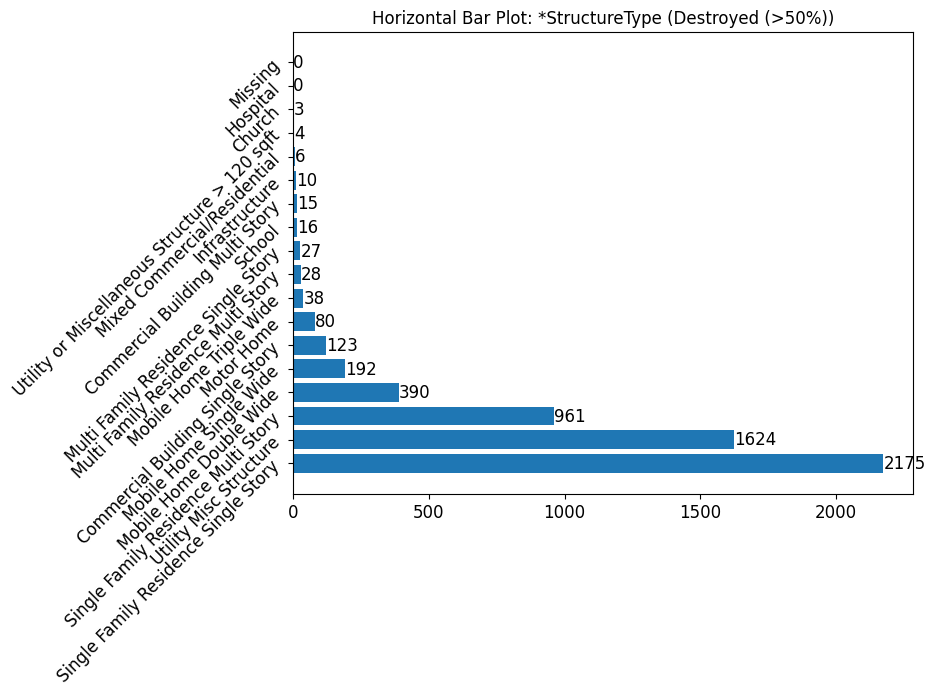

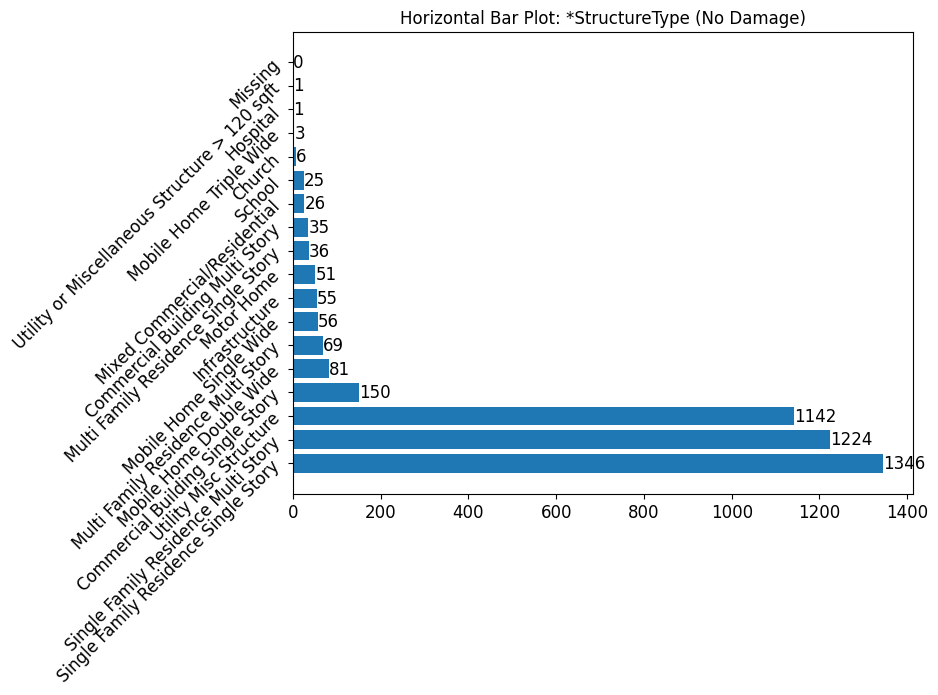

In [ ]:
df_damage_count = df_damage['*StructureType'].value_counts()

# Plotting the horizontal bar plot using Matplotlib
plt.figure(figsize=(8, 6))
bars = plt.barh(df_damage_count.index, df_damage_count.values)

# Add count labels to the bars
for bar in bars:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, 
    int(bar.get_width()), va='center', ha='left')
plt.yticks(rotation=45)
plt.title('Horizontal Bar Plot: ' + '*StructureType' + ' (Destroyed (>50%))')
plt.show()


df_no_damage = df[df['*Damage'] == 'No Damage']


df_no_damage_count = df_no_damage['*StructureType'].value_counts()
# Plotting the horizontal bar plot using Matplotlib
plt.figure(figsize=(8, 6))
bars = plt.barh(df_no_damage_count.index, df_no_damage_count.values)

for bar in bars:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, 
    int(bar.get_width()), va='center', ha='left')
plt.yticks(rotation=45)
plt.title('Horizontal Bar Plot: ' + '*StructureType' + ' (No Damage)')
plt.show()

*Damage vs *StructureType

-The mode for this feature is single family residence single story with more single family residences being destroyed than surviving. It is interesting to note that when we examine single family residence multi story we can see that more of these structures survived than were destroyed. This may indicate that multistory homes are less susceptible to structural damage than single story homes. 

### 3.1 Discuss your findings from the plots above. Do you find any features or feature combinations that are indicative of the target outcome? Explain in plain words (a short paragraph) the story of your findings so far.

**Continuous-Categorical**

-Overall, due to the low number of continous features in this dataset there are less plotwise feature pairs to examine.

-Initially, I was optimistic that plotting *Damage vs. YearBuilt(parcel) would give us a good indication of which structures constructed in which year would be more susceptible to damage. However, the results are somewhat inconclusive with the only promising information being that it appears that less structures built after 2000 were destroyed than survived.

-This is also true when plotting *Damage vs. AssessedImproved Value(parcel) with the plot providing little insight other than that the vast majority of entries in the dataset had an assessed improved value less than $400,000. This feature would be of more utility for our purposes if it detailed what improvements were made as opposed to just a value.

**Categorical-Categorical**

-Overall, there were a much larger number of categorical features to examine and compare due to the nature of the dataset.

-I would argue that the plotting of categorical-categorical features was much more effective in terms of predicting risk of structural damage. For instance from these barplots we can see that there is a higher level of risk of structural damage for a single story family residence with no fence, no eaves, no vents and combustible exterior siding will increase the risk of structural damage. 

-The plotting and comparing of these categorical features when compared to the feature *Damage proves that the structural features of an entry are a good indicator to help predict structural risk.





### (4). [15] Create new features: Transform, extend or combine the existing features, or add new features from external sources, to create a few new features (at least 3) with the aim to better capture the problem domain and the target outcome. Justify the steps and choices you are making. In the grading, consideration will be given to the creativity and domain knowledge shown in preparing the new features. Use code to show that your new features are indeed useful for the target prediction problem. Add these features to your clean dataset and save it as a CSV file with a self explanatory name. 

**New Feature 1**

StructureAge - Gives the current age of the structure in relation to the current year.
Feature will be helpful in determining if older structures are more susceptible to fire damage then more recently constructed structures.
Could give a good indication of modern or older construction techniques are better at preventing fire damage.

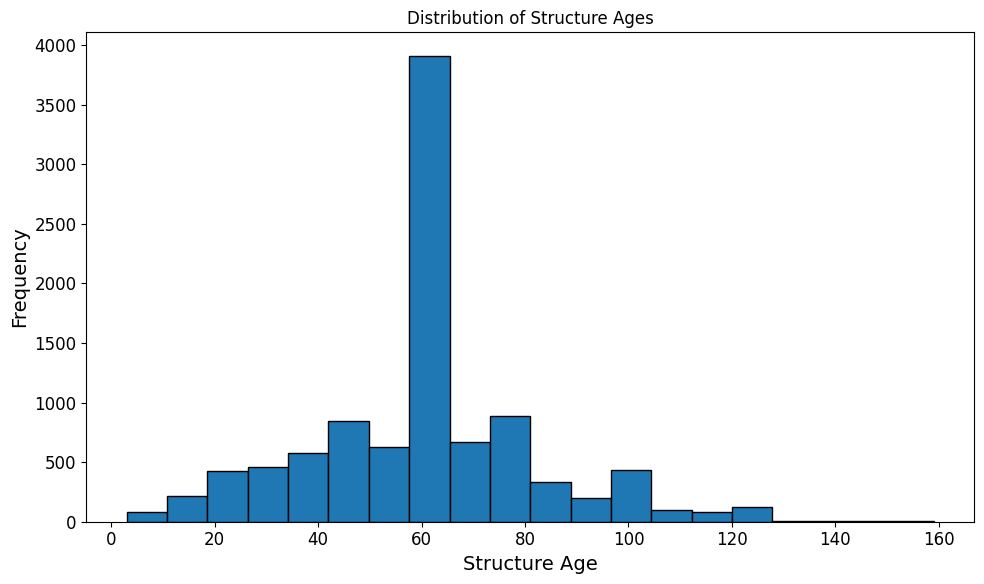

In [54]:
current_year = datetime.now().year
df['StructureAge'] = current_year - df['YearBuilt(parcel)']

# Plot the histogram for StructureAge
plt.figure(figsize=(10, 6))
plt.hist(df['StructureAge'], bins=20, edgecolor='black')

# Add labels and title for the histogram
plt.xlabel('Structure Age')
plt.ylabel('Frequency')
plt.title('Distribution of Structure Ages')

# Display the plot
plt.tight_layout()  
plt.show()

New Feature 2

Num_Wildfire_Incidents_Per_County - This feature uses data from the California_Fire_Incidents.csv to display the number of wildfire incidents which occurred in each county between 2013 - 2020. This data does not show the number of structures damaged but the number of wildfire incidents that occured in each county. This data has been merged with the main data frame and I believe having access to this historical data will help us better understand which areas are most at risk of structural damage.

In [55]:
# reading from the new csv file.
df2 = pd.read_csv('California_Fire_Incidents.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)

# cleaned column names to remove white space.
df2.columns = df2.columns.str.replace(' ', '')

# set max number of rows to be displayed as 100.
pd.set_option('display.max_rows', 100)


# Getting the value count for each county.                               
num_wildfire_incidents_per_county = df2['Counties'].value_counts().reset_index()
num_wildfire_incidents_per_county.columns = ['County', 'Num_Wildfire_Incidents_Per_County']

#mergining the new feature into the original data frame.
df = pd.merge(df, num_wildfire_incidents_per_county, on='County', how='left')

# Removing any missing values.
df['Num_Wildfire_Incidents_Per_County'] = df['Num_Wildfire_Incidents_Per_County'].fillna('Missing')

df.to_csv('Test343425425.csv')

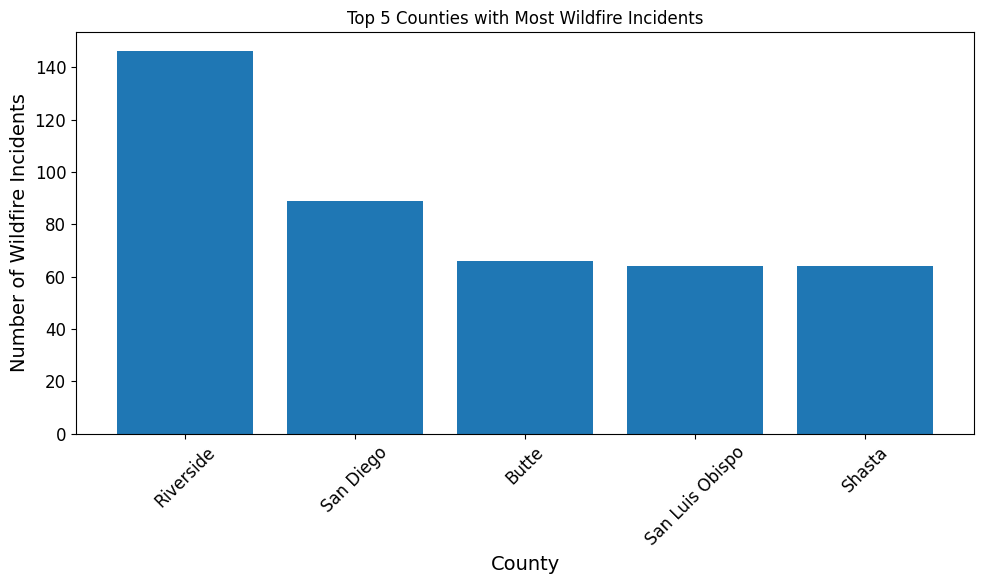

In [56]:
top_5_counties = num_wildfire_incidents_per_county.sort_values(by='Num_Wildfire_Incidents_Per_County', ascending=False).head(5)

# Plot the histogram for the top 5 counties
plt.figure(figsize=(10, 6))
plt.bar(top_5_counties['County'], top_5_counties['Num_Wildfire_Incidents_Per_County'])

# Add labels and title
plt.xlabel('County')
plt.ylabel('Number of Wildfire Incidents')
plt.title('Top 5 Counties with Most Wildfire Incidents')

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make it fit well
plt.show()

From the above barchart we can see that the the largest number of notable wildfire incidents occurred in riverside county between 2013 - 2020. The use of this historical data will be imperative when trying to predict structural risk as it will inform as to which counties are most at risks of wildfires and therefore structural damage.

New Feature 3

Weather Data - This addition comprises multiple new features (4 in total) but I am completeting this under one section for readability. Please note that all weather information is in farenheit and not celsius.

 Using weather data from the dataset CA_Weather_Fire_Dataset_1984-2025 (which has been included in the zip file) we can see the level of percipitation, the maximum temperature, the minimum temperature, the average wind speed and season for each incident start date in our data set.
 
Understanding the relationship between the weather conditions on the day that the wildfire incident started is essential in order to predict the emergence of new incidents. Understanding the affect wind speed, the lack of percipitation and high temperatures can have and how this can aid the spreading of wildfires is imperative. 

**Merging in CA_Weather_Fire_Dataset_1984_2025 with our existing dataset.**

In [57]:
# reading from the new csv file.
df_weather = pd.read_csv('CA_Weather_Fire_Dataset_1984-2025.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)

# cleaned column names to remove white space.
df_weather.columns = df_weather.columns.str.replace(' ', '')

# set max number of rows to be displayed as 100.
pd.set_option('display.max_rows', 100)


df_weather['DATE'] = pd.to_datetime(df_weather['DATE'])


df['IncidentStartDate'] = pd.to_datetime(df['IncidentStartDate'])

df = pd.merge(df, df_weather, left_on='IncidentStartDate', right_on='DATE', how='left')                                                         

#Dropping redundant features - 'DATE', 'FIRE_START_DAY', 'YEAR', 'TEMP_RANGE', 'WIND_TEMP_RATIO', 'MONTH', DAY_OF_YEAR'
df = df.drop(columns=['DATE', 'FIRE_START_DAY', 'YEAR', 'TEMP_RANGE', 'WIND_TEMP_RATIO', 'MONTH', 'DAY_OF_YEAR', 'LAGGED_PRECIPITATION', 'LAGGED_AVG_WIND_SPEED', 'SEASON'])

# Renaming the new features for consistency.
df = df.rename(columns={
    'PRECIPITATION': 'Precipitation',
    'MAX_TEMP': 'Max_Temperature',
    'MIN_TEMP': 'Min_Temperature',
    'AVG_WIND_SPEED': 'Avg_Wind_Speed',
})

df[['Precipitation','Max_Temperature', 'Min_Temperature','Avg_Wind_Speed']] = df[['Precipitation','Max_Temperature', 'Min_Temperature','Avg_Wind_Speed']].astype('Float64')

weather_features = df[['Precipitation','Max_Temperature', 'Min_Temperature','Avg_Wind_Speed']]

weather_features.describe()


,Precipitation,Max_Temperature,Min_Temperature,Avg_Wind_Speed
count,7579.0,7579.0,7579.0,7579.0
mean,0.00023,78.084048,63.178652,6.53395
std,0.001838,7.509873,4.923378,1.572
min,0.0,62.0,45.0,3.8
25%,0.0,72.0,59.0,4.7
50%,0.0,75.0,63.0,6.49
75%,0.0,81.0,67.0,7.38
max,0.02,101.0,75.0,14.99


From looking at the above results we can see that the vast majority of incident start dates had a level of 0.0 cms of precipitation. Alongside this, we can see that the average wind speed is 6.5 miles per hour on the days when a wildfire started and the average maximum temperature was 78°f. This data demonstrates that high wind speeds and low levels of precipitation lead to wildfire spread.

In [ ]:
df[['Precipitation','Max_Temperature', 'Min_Temperature','Avg_Wind_Speed']] = df[['Precipitation','Max_Temperature', 'Min_Temperature','Avg_Wind_Speed']].astype('object')


df[['Precipitation','Max_Temperature', 'Min_Temperature','Avg_Wind_Speed']] = df[['Precipitation','Max_Temperature', 'Min_Temperature','Avg_Wind_Speed']].fillna('Missing')

#Adding updated dataframe to new csv.
df.to_csv('cal-wildfires-24241048-COMPLETE.csv')